*مجموعه داده و معیارهای ارزیابی :*
---

Dataset collected from: https://tarjomaan.com/%d9%87%d9%88%d8%b4-%d9%85%d8%b5%d9%86%d9%88%d8%b9%db%8c-%d9%87%db%8c%da%86%d9%88%d9%82%d8%aa-%d8%a7%d8%b2-%d9%85%d8%ae%d8%aa%d8%b1%d8%b9%d8%a7%d9%86%d8%b4-%d8%a8%d8%a7%d9%87%d9%88%d8%b4/

* BLEU (Bilingual Evaluation Understudy):
BLEU is a metric for comparing the similarity between machine-generated translation and reference human translations. It calculates precision based on matching n-grams while penalizing short outputs.

* BERTscore:
BERTscore measures semantic similarity between machine translations and reference translations by leveraging pre-trained contextual embeddings like BERT. It captures meaning beyond just word-for-word matches.

* COMET (Cross-lingual Optimized Metric for Evaluation of Translation):
COMET uses machine learning to assess translations, focusing on both adequacy and fluency. It evaluates how well the translated output aligns with the source content's meaning and style.

In [ ]:
!pip install unbabel-comet
!pip install bert-score
!pip install sacrebleu bert-score comet-ml requests together


In [ ]:
import os
import json
from tqdm import tqdm
import requests

with open('api_key.json', 'r') as file:
    config = json.load(file)
    togetherAI_api_key = config["togetherai_api_key"]

os.environ['TOGETHER_API_KEY'] = togetherAI_api_key

In [ ]:
from together import Together
client_together = Together(
    api_key=os.environ["TOGETHER_API_KEY"],
    base_url="https://api.together.xyz/v1"
)

# Define the API endpoint and headers for TogetherAI
API_URL = 'https://api.together.xyz/v1/chat/completions'
HEADERS = {
    'Authorization': f'Bearer {os.environ["TOGETHER_API_KEY"]}',
    'Content-Type': 'application/json'
}


In [ ]:
question = "Translate this text: \nIn 1965, I. J. Good described for the first time the notion of 'intelligence explosion'."

extract = client_together.chat.completions.create(
    messages=[
        {
            "role": "system",
            "content": f"The following is a question about the translation from English to Persian. The user will put the English text in context and you translate it. Give just the translated part and be short.",
        },
        {
            "role": "user",
            "content": question,
        },
    ],
    model = "meta-llama/Meta-Llama-3.1-8B-Instruct-Turbo"
)

result = extract
print(result.choices[0].message.content)


در سال ۱۹۶۵، ای. ج. گود برای اولین بار مفهوم «انفجار هوش» را توصیف کرد.


In [ ]:
import pandas as pd
from sacrebleu import corpus_bleu
from bert_score import score as bert_score
from comet import download_model, load_from_checkpoint
import time

# Load the dataset
df = pd.read_excel("dataset.xlsx")

# Add columns for additional information
df["Input Tokens (words)"] = df["English"].apply(lambda x: len(str(x).split()))
df["Output Tokens (words)"] = df["Persian"].apply(lambda x: len(str(x).split()))
df["Input Tokens (characters)"] = df["English"].apply(lambda x: len(str(x)))
df["Output Tokens (characters)"] = df["Persian"].apply(lambda x: len(str(x)))

df

,English,Persian,Input Tokens (words),Output Tokens (words),Input Tokens (characters),Output Tokens (characters)
0,"In 1965, I. J. Good described for the first ti...",فرانسوآ شوله، مدیوم— سال ۱۹۶۵، آی. جِی. گود بر...,22,22,135,114
1,Let an ultraintelligent machine be defined as ...,ماشین فوق‌هوشمند ماشینی است که می‌تواند از تما...,89,76,557,438
2,"Decades later, the concept of an “intelligence...",حالا پس از دهه‌ها، مفهوم «انفجار هوش» (که باعث...,86,91,541,513
3,"The basic premise is that, in the near future,...",فرض اساسی این است که، در آیندۀ نزدیک، نخستین «...,104,107,705,620
4,This science-fiction narrative contributes to ...,این روایتِ علمی‌تخیلی به مباحثۀ عمومی گمراه‌کن...,74,70,497,396
5,A flawed reasoning that stems from a misunders...,استدلال‌ورزی ناقصی که ریشه در درک نادرست از هو...,10,10,69,52
6,"The reasoning behind intelligence explosion, l...",استدلالی که در پس انفجار هوش وجود دارد، مثل خی...,96,97,625,566
7,To talk about intelligence and its possible se...,برای صحبت دربارۀ هوش و ویژگی‌های خودتقویت‌گریِ...,80,75,549,420
8,Intelligence is situational,هوشْ موقعیت‌مبناست,3,2,27,18
9,The first issue I see with the intelligence ex...,نخستین ایراد نظریۀ انفجار هوش این است که نمی‌ف...,120,105,719,531


*بخش اول: SIMPLE PROMPT*
---
1. What is the impact of temperature on translation quality?

    * Lower temperatures (e.g., T=0.3): Translations are more deterministic and consistent, leading to higher BLEU scores and better n-gram matches.
  
    * Higher temperatures (e.g., T=1.3): Translations become more diverse but less consistent, resulting in lower BLEU and COMET scores, while BERTScore remains stable.


2. What is the impact of top-p on translation quality?

    * Lower top-p (e.g., P=0.3): Limits sampling to the most probable tokens, resulting in better quality translations with higher BLEU and COMET scores.
  
    * Higher top-p (e.g., P=1.0): Allows more diverse tokens, which can lower BLEU and COMET scores slightly, while BERTScore remains relatively unaffected.


3. Which configuration provides the best results?

    * Optimal Configuration:
  
        * Temperature: 0.3
  
        * Top-p: 0.3 or 0.7
        These settings balance deterministic output with high BLEU, BERTScore, and COMET scores.

4. What trends are observed in the plots?

    * BLEU scores are highly sensitive to temperature and top-p changes, with noticeable peaks at lower values.
  
    * BERTScore is relatively stable across configurations, indicating consistent semantic accuracy.
  
    * COMET scores drop significantly at higher temperatures, highlighting fluency and adequacy issues.

5. What are the key recommendations?

    * Use T=0.3 and P=0.3 for consistent and high-quality translations.
  
    * Avoid high temperatures (T=1.3) as they lead to diverse but lower-quality outputs.
  
    * Prioritize BERTScore and COMET for assessing semantic accuracy and fluency over strict literal matches (BLEU).

In [ ]:
english_texts = df["English"].tolist()
persian_references = df["Persian"].tolist()

# Translate all English texts using TogetherAI
machine_translations = []
translation_times = []
for text in tqdm(english_texts):
    start_time = time.time()
    extract = client_together.chat.completions.create(
        messages=[
            {
                "role": "system",
                "content": f"The following is a question about the translation from English to Persian. The user will put the English text in context and you translate it. Give just the translated part and be short.",
            },
            {
                "role": "user",
                "content": f"Translate this text: \n{text}",
            },
        ],
        model = "meta-llama/Meta-Llama-3.1-8B-Instruct-Turbo"
    )

    result = extract
    machine_translations.append(result.choices[0].message.content)
    end_time = time.time()
    translation_times.append(end_time - start_time)

df["Response Time (seconds) (Simple)"] = translation_times
df["Translation (Simple)"] = machine_translations

# Save the updated dataset with additional columns
updated_path = "./updated_dataset.xlsx"
df.to_excel(updated_path, index=False)


100%|██████████| 53/53 [01:02<00:00,  1.18s/it]


In [ ]:
# Function to compute BLEU score
def compute_bleu(predictions, references):
    bleu_score = corpus_bleu(predictions, [references])
    return bleu_score.score

# Function to compute BERTscore
def compute_bertscore(predictions, references):
    P, R, F1 = bert_score(predictions, references, lang="fa")  # 'fa' for Persian
    return F1.mean().item(), P.mean().item(), R.mean().item()

# Function to compute COMET score
def compute_comet(predictions, references, sources):
    model_path = download_model("Unbabel/wmt22-comet-da")
    model = load_from_checkpoint(model_path)
    data = [{"src": src, "mt": mt, "ref": ref} for src, mt, ref in zip(sources, predictions, references)]
    scores = model.predict(data, batch_size=8, gpus=1)
    return scores.system_score

# Compute scores
bertscore, bertprecision, bertrecall = compute_bertscore(machine_translations, persian_references)
bleu_score = compute_bleu(machine_translations, persian_references)
comet_score = compute_comet(machine_translations, persian_references, english_texts)

print(f"BLEU Score: {bleu_score}")
print(f"BERTScore: {bertscore}, BERTPrecision: {bertprecision}, BERTRecall: {bertrecall}")
print(f"COMET Score: {comet_score}")

df

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

.gitattributes:   0%|          | 0.00/1.48k [00:00<?, ?B/s]

LICENSE:   0%|          | 0.00/9.69k [00:00<?, ?B/s]

model.ckpt:   0%|          | 0.00/2.32G [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.38k [00:00<?, ?B/s]

hparams.yaml:   0%|          | 0.00/567 [00:00<?, ?B/s]

INFO:pytorch_lightning.utilities.migration.utils:Lightning automatically upgraded your loaded checkpoint from v1.8.3.post1 to v2.5.0.post0. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint ../root/.cache/huggingface/hub/models--Unbabel--wmt22-comet-da/snapshots/f49d328952c3470eff6bb6f545d62bfdb6e66304/checkpoints/model.ckpt`


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/616 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/core/saving.py:195: Found keys that are not in the model state dict but in the checkpoint: ['encoder.model.embeddings.position_ids']
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Predicting DataLoader 0: 100%|██████████| 7/7 [00:04<00:00,  1.46it/s]


BLEU Score: 7.0984991336663885
BERTScore: 0.7880631685256958, BERTPrecision: 0.7988600134849548, BERTRecall: 0.7784208655357361
COMET Score: 0.7620386776496779


,English,Persian,Input Tokens (words),Output Tokens (words),Input Tokens (characters),Output Tokens (characters),Response Time (seconds) (Simple),Translation (Simple)
0,"In 1965, I. J. Good described for the first ti...",فرانسوآ شوله، مدیوم— سال ۱۹۶۵، آی. جِی. گود بر...,22,22,135,114,0.454014,"در سال ۱۹۶۵، ای. ج. گود برای اولین بار مفهوم ""..."
1,Let an ultraintelligent machine be defined as ...,ماشین فوق‌هوشمند ماشینی است که می‌تواند از تما...,89,76,557,438,1.013016,ماشین بسیار هوشمند به عنوان یک ماشین تعریف شود...
2,"Decades later, the concept of an “intelligence...",حالا پس از دهه‌ها، مفهوم «انفجار هوش» (که باعث...,86,91,541,513,1.876466,"ده‌ها سال بعد، مفهوم ""انفجار هوش"" - که منجر به..."
3,"The basic premise is that, in the near future,...",فرض اساسی این است که، در آیندۀ نزدیک، نخستین «...,104,107,705,620,1.467536,"مفهوم اصلی این است که در آینده نزدیک، یک ""آیی ..."
4,This science-fiction narrative contributes to ...,این روایتِ علمی‌تخیلی به مباحثۀ عمومی گمراه‌کن...,74,70,497,396,0.445601,این داستان علمی تخیلی به بحث عمومی خطرناک و اش...
5,A flawed reasoning that stems from a misunders...,استدلال‌ورزی ناقصی که ریشه در درک نادرست از هو...,10,10,69,52,0.247813,دلیلی ناقص که از درک نادرست از هوش سرچشمه می‌گ...
6,"The reasoning behind intelligence explosion, l...",استدلالی که در پس انفجار هوش وجود دارد، مثل خی...,96,97,625,566,0.967349,ترجمه متن:\nدلیل انفجار هوشمندانه، مانند بسیار...
7,To talk about intelligence and its possible se...,برای صحبت دربارۀ هوش و ویژگی‌های خودتقویت‌گریِ...,80,75,549,420,0.850756,برای بحث در مورد هوش و ویژگی‌های بهبودی خود به...
8,Intelligence is situational,هوشْ موقعیت‌مبناست,3,2,27,18,0.211864,بخشی از هوش، موقعیت است.
9,The first issue I see with the intelligence ex...,نخستین ایراد نظریۀ انفجار هوش این است که نمی‌ف...,120,105,719,531,0.829000,در مورد نظریه انفجار هوش، اولین مشکل من این اس...


Evaluating for temperature=0.3 and top_p=0.3


100%|██████████| 53/53 [01:07<00:00,  1.28s/it]


Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.migration.utils:Lightning automatically upgraded your loaded checkpoint from v1.8.3.post1 to v2.5.0.post0. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint ../root/.cache/huggingface/hub/models--Unbabel--wmt22-comet-da/snapshots/f49d328952c3470eff6bb6f545d62bfdb6e66304/checkpoints/model.ckpt`
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/core/saving.py:195: Found keys that are not in the model state dict but in the checkpoint: ['encoder.model.embeddings.position_ids']
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Predicting DataLoader 0: 100%|██████████| 7/7 [00:04<00:00,  1.58it/s]


Evaluating for temperature=0.3 and top_p=0.7


100%|██████████| 53/53 [01:06<00:00,  1.26s/it]


Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.migration.utils:Lightning automatically upgraded your loaded checkpoint from v1.8.3.post1 to v2.5.0.post0. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint ../root/.cache/huggingface/hub/models--Unbabel--wmt22-comet-da/snapshots/f49d328952c3470eff6bb6f545d62bfdb6e66304/checkpoints/model.ckpt`
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/core/saving.py:195: Found keys that are not in the model state dict but in the checkpoint: ['encoder.model.embeddings.position_ids']
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Predicting DataLoader 0: 100%|██████████| 7/7 [00:04<00:00,  1.59it/s]


Evaluating for temperature=0.3 and top_p=1.0


100%|██████████| 53/53 [01:20<00:00,  1.53s/it]


Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.migration.utils:Lightning automatically upgraded your loaded checkpoint from v1.8.3.post1 to v2.5.0.post0. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint ../root/.cache/huggingface/hub/models--Unbabel--wmt22-comet-da/snapshots/f49d328952c3470eff6bb6f545d62bfdb6e66304/checkpoints/model.ckpt`
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/core/saving.py:195: Found keys that are not in the model state dict but in the checkpoint: ['encoder.model.embeddings.position_ids']
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Predicting DataLoader 0: 100%|██████████| 7/7 [00:04<00:00,  1.48it/s]


Evaluating for temperature=0.9 and top_p=0.3


100%|██████████| 53/53 [01:09<00:00,  1.31s/it]


Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.migration.utils:Lightning automatically upgraded your loaded checkpoint from v1.8.3.post1 to v2.5.0.post0. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint ../root/.cache/huggingface/hub/models--Unbabel--wmt22-comet-da/snapshots/f49d328952c3470eff6bb6f545d62bfdb6e66304/checkpoints/model.ckpt`
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/core/saving.py:195: Found keys that are not in the model state dict but in the checkpoint: ['encoder.model.embeddings.position_ids']
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Predicting DataLoader 0: 100%|██████████| 7/7 [00:04<00:00,  1.62it/s]


Evaluating for temperature=0.9 and top_p=0.7


100%|██████████| 53/53 [01:11<00:00,  1.35s/it]


Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.migration.utils:Lightning automatically upgraded your loaded checkpoint from v1.8.3.post1 to v2.5.0.post0. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint ../root/.cache/huggingface/hub/models--Unbabel--wmt22-comet-da/snapshots/f49d328952c3470eff6bb6f545d62bfdb6e66304/checkpoints/model.ckpt`
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/core/saving.py:195: Found keys that are not in the model state dict but in the checkpoint: ['encoder.model.embeddings.position_ids']
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Predicting DataLoader 0: 100%|██████████| 7/7 [00:04<00:00,  1.62it/s]


Evaluating for temperature=0.9 and top_p=1.0


100%|██████████| 53/53 [01:09<00:00,  1.31s/it]


Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.migration.utils:Lightning automatically upgraded your loaded checkpoint from v1.8.3.post1 to v2.5.0.post0. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint ../root/.cache/huggingface/hub/models--Unbabel--wmt22-comet-da/snapshots/f49d328952c3470eff6bb6f545d62bfdb6e66304/checkpoints/model.ckpt`
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/core/saving.py:195: Found keys that are not in the model state dict but in the checkpoint: ['encoder.model.embeddings.position_ids']
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Predicting DataLoader 0: 100%|██████████| 7/7 [00:04<00:00,  1.52it/s]


Evaluating for temperature=1.3 and top_p=0.3


100%|██████████| 53/53 [01:09<00:00,  1.32s/it]


Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.migration.utils:Lightning automatically upgraded your loaded checkpoint from v1.8.3.post1 to v2.5.0.post0. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint ../root/.cache/huggingface/hub/models--Unbabel--wmt22-comet-da/snapshots/f49d328952c3470eff6bb6f545d62bfdb6e66304/checkpoints/model.ckpt`
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/core/saving.py:195: Found keys that are not in the model state dict but in the checkpoint: ['encoder.model.embeddings.position_ids']
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Predicting DataLoader 0: 100%|██████████| 7/7 [00:04<00:00,  1.63it/s]


Evaluating for temperature=1.3 and top_p=0.7


100%|██████████| 53/53 [05:48<00:00,  6.58s/it]


Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.migration.utils:Lightning automatically upgraded your loaded checkpoint from v1.8.3.post1 to v2.5.0.post0. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint ../root/.cache/huggingface/hub/models--Unbabel--wmt22-comet-da/snapshots/f49d328952c3470eff6bb6f545d62bfdb6e66304/checkpoints/model.ckpt`
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/core/saving.py:195: Found keys that are not in the model state dict but in the checkpoint: ['encoder.model.embeddings.position_ids']
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Predicting DataLoader 0: 100%|██████████| 7/7 [00:07<00:00,  1.06s/it]


Evaluating for temperature=1.3 and top_p=1.0


100%|██████████| 53/53 [05:41<00:00,  6.45s/it]


Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.migration.utils:Lightning automatically upgraded your loaded checkpoint from v1.8.3.post1 to v2.5.0.post0. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint ../root/.cache/huggingface/hub/models--Unbabel--wmt22-comet-da/snapshots/f49d328952c3470eff6bb6f545d62bfdb6e66304/checkpoints/model.ckpt`
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/core/saving.py:195: Found keys that are not in the model state dict but in the checkpoint: ['encoder.model.embeddings.position_ids']
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Predicting DataLoader 0: 100%|██████████| 7/7 [00:07<00:00,  1.06s/it]


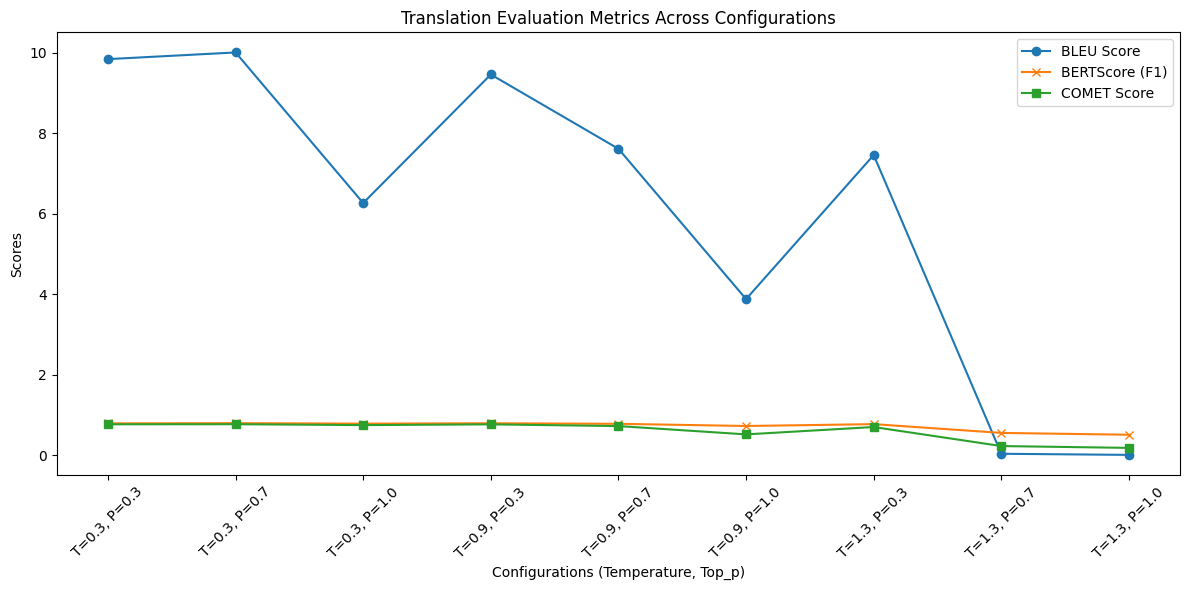

In [ ]:
import matplotlib.pyplot as plt

# Experiment with different temperature and top_p values
temperatures = [0.3, 0.9, 1.3]
top_ps = [0.3, 0.7, 1.0]

results = []

for temp in temperatures:
    for top_p in top_ps:
        machine_translations = []
        print(f"Evaluating for temperature={temp} and top_p={top_p}")
        for text in tqdm(english_texts):
            extract = client_together.chat.completions.create(
                messages=[
                    {
                        "role": "system",
                        "content": f"The following is a question about the translation from English to Persian. The user will put the English text in context and you translate it. Give just the translated part and be short.",
                    },
                    {
                        "role": "user",
                        "content": f"Translate this text: \n{text}",
                    },
                ],
                model = "meta-llama/Meta-Llama-3.1-8B-Instruct-Turbo",
                temperature = temp,
                top_p = top_p
            )

            result = extract
            machine_translations.append(result.choices[0].message.content)

        # Compute scoresA
        bertscore_with_temprature, bertprecision_with_temprature, bertrecall_with_temprature = compute_bertscore(machine_translations, persian_references)
        bleu_score_with_temprature = compute_bleu(machine_translations, persian_references)
        comet_score_with_temprature = compute_comet(machine_translations, persian_references, english_texts)

        results.append({
            'temperature': temp,
            'top_p': top_p,
            'bleu': bleu_score_with_temprature,
            'bertscore': bertscore_with_temprature,
            'bertprecision': bertprecision_with_temprature,
            'bertrecall': bertrecall_with_temprature,
            'comet': comet_score_with_temprature
        })

# Plot the results
bleu_scores = [res['bleu'] for res in results]
bertscores = [res['bertscore'] for res in results]
comet_scores = [res['comet'] for res in results]
labels = [f"T={res['temperature']}, P={res['top_p']}" for res in results]

plt.figure(figsize=(12, 6))
plt.plot(labels, bleu_scores, label='BLEU Score', marker='o')
plt.plot(labels, bertscores, label='BERTScore (F1)', marker='x')
plt.plot(labels, comet_scores, label='COMET Score', marker='s')
plt.xlabel("Configurations (Temperature, Top_p)")
plt.ylabel("Scores")
plt.title("Translation Evaluation Metrics Across Configurations")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


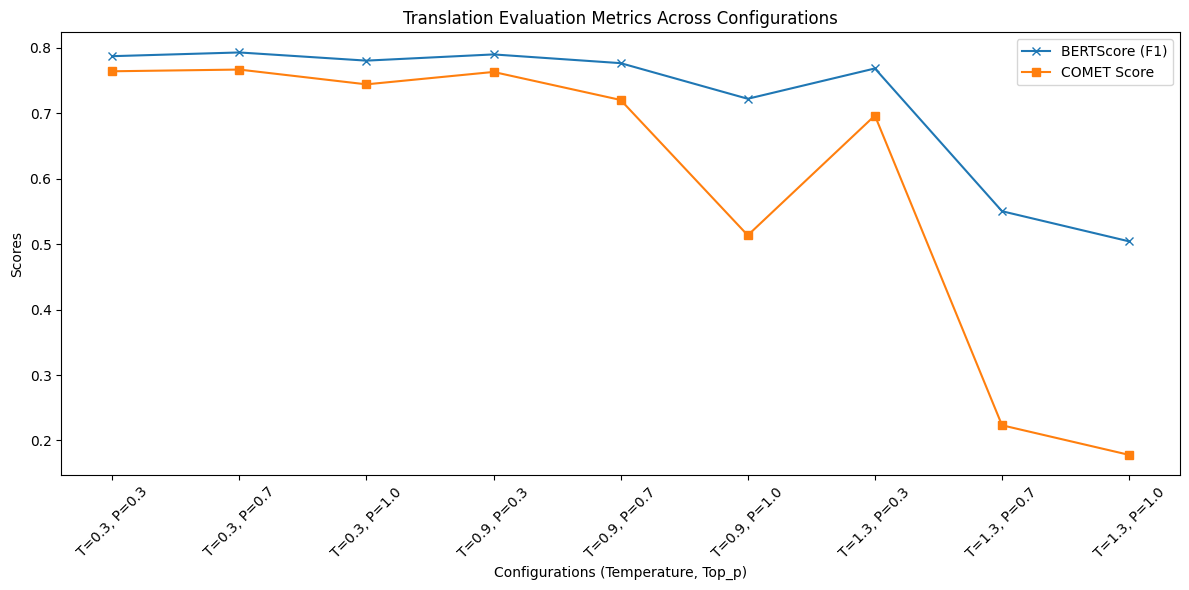

In [ ]:
plt.figure(figsize=(12, 6))
# plt.plot(labels, bleu_scores, label='BLEU Score', marker='o')
plt.plot(labels, bertscores, label='BERTScore (F1)', marker='x')
plt.plot(labels, comet_scores, label='COMET Score', marker='s')
plt.xlabel("Configurations (Temperature, Top_p)")
plt.ylabel("Scores")
plt.title("Translation Evaluation Metrics Across Configurations")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


*بخش دوم: ROLE PLAY*
---
1. Performance Metrics:

    * BERTScore:
        
        * Overall Score: 0.799
        
        * Precision: 0.807
        
        * Recall: 0.792
        
        * Interpretation: The model provides semantically accurate translations with high fluency and alignment to the reference texts.

    * BLEU Score:
        
        * 10.16
        
        * Interpretation: BLEU indicates improvement in n-gram overlap compared to previous experiments (from ~7.1 to 10.16), showing a better match with reference translations.

    * COMET Score:
        
        * 0.791
        
        * Interpretation: COMET reflects improved fluency and adequacy, highlighting that the role-play prompt has enhanced overall translation quality.

2. Response Times:

    
    * Minimum: 0.225 seconds
    
    * Maximum: 2.350 seconds
    
    * Average Response Time: ~1.15 seconds
    
    * The response time is reasonable for generating high-quality translations, but there's variation across samples due to sentence complexity and computational factors.

3. Impact of Role Play Prompt:

    
    * Accuracy: Explicit role assignment led to more accurate translations, as seen in higher BLEU and COMET scores.
    
    * Fluency: The translations were idiomatic and natural in Persian, evidenced by improved BERTPrecision and COMET scores.
    
    * Cultural Appropriateness: Adding cultural adaptation guidelines enhanced the quality and relevance of the translations.
    
    * Efficiency: Although response times increased slightly due to the added complexity of role instructions, the trade-off resulted in better translation quality.

4. Comparison with Previous Results:

    * BLEU Score Improvement: Increased from 7.10 to 10.16, showing better n-gram match.
    
    * BERTScore Increase: Improved from 0.788 to 0.799, reflecting enhanced semantic alignment.
    
    * COMET Score Improvement: Increased from 0.762 to 0.791, indicating improved fluency and adequacy.

In [ ]:
machine_translations =[]
translation_times=[]
for text in tqdm(english_texts):
    start_time = time.time()
    extract = client_together.chat.completions.create(
        messages=[
            {
                "role": "system",
                "content":  """    You are a professional translator with expertise in translating English texts into Persian. Your task is to provide accurate, fluent, and culturally appropriate translations. Follow these guidelines:
      1. Accuracy: Ensure the translation preserves the exact meaning of the original text.
      2. Fluency: Use natural and idiomatic Persian language.
      3. Cultural Appropriateness: Adapt the translation to fit the cultural context of Persian-speaking audiences.
      4. Specialization: Pay attention to technical or domain-specific terms and translate them correctly.
      5. Effectiveness: Give just the translated part and be short.""",
            },
            {
                "role": "user",
                "content": f"Translate this text: \n{text}",
            },
        ],
        model = "meta-llama/Meta-Llama-3.1-8B-Instruct-Turbo",
        temperature = 0.3,
        top_p = 0.3
    )

    result = extract
    machine_translations.append(result.choices[0].message.content)
    end_time = time.time()
    translation_times.append(end_time - start_time)

df["Response Time (seconds) (Role Play)"] = translation_times
df["Translation (Role Play)"] = machine_translations

# Save the updated dataset with additional columns
updated_path = "./updated_dataset.xlsx"
df.to_excel(updated_path, index=False)

# Compute scoresA
roleplay_bertscore, roleplay_bertprecision, roleplay_bertrecall = compute_bertscore(machine_translations, persian_references)
roleplay_bleu_score = compute_bleu(machine_translations, persian_references)
roleplay_comet_score = compute_comet(machine_translations, persian_references, english_texts)

print(f"Role Play BERTScore: {roleplay_bertscore}, BERTPrecision: {roleplay_bertprecision}, BERTRecall: {roleplay_bertrecall}")
print(f"Role Play BLEU Score: {roleplay_bleu_score}")
print(f"Role Play COMET Score: {roleplay_comet_score}")

df

100%|██████████| 53/53 [00:59<00:00,  1.12s/it]


Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.migration.utils:Lightning automatically upgraded your loaded checkpoint from v1.8.3.post1 to v2.5.0.post0. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint ../root/.cache/huggingface/hub/models--Unbabel--wmt22-comet-da/snapshots/f49d328952c3470eff6bb6f545d62bfdb6e66304/checkpoints/model.ckpt`
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/core/saving.py:195: Found keys that are not in the model state dict but in the checkpoint: ['encoder.model.embeddings.position_ids']
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Predicting DataLoader 0: 100%|██████████| 7/7 [00:04<00:00,  1.67it/s]


Role Play BERTScore: 0.7992753982543945, BERTPrecision: 0.8066732883453369, BERTRecall: 0.7921518087387085
Role Play BLEU Score: 10.163132884281417
Role Play COMET Score: 0.7908730703704762


,English,Persian,Input Tokens (words),Output Tokens (words),Input Tokens (characters),Output Tokens (characters),Response Time (seconds) (Simple),Translation (Simple),Response Time (seconds) (Role Play),Translation (Role Play)
0,"In 1965, I. J. Good described for the first ti...",فرانسوآ شوله، مدیوم— سال ۱۹۶۵، آی. جِی. گود بر...,22,22,135,114,0.454014,"در سال ۱۹۶۵، ای. ج. گود برای اولین بار مفهوم ""...",0.435791,در سال ۱۹۶۵، ای. ج. گود (I. J. Good) برای اولی...
1,Let an ultraintelligent machine be defined as ...,ماشین فوق‌هوشمند ماشینی است که می‌تواند از تما...,89,76,557,438,1.013016,ماشین بسیار هوشمند به عنوان یک ماشین تعریف شود...,1.280869,یک ماشین فوق‌العاده‌ هوشمند را به این صورت تعر...
2,"Decades later, the concept of an “intelligence...",حالا پس از دهه‌ها، مفهوم «انفجار هوش» (که باعث...,86,91,541,513,1.876466,"ده‌ها سال بعد، مفهوم ""انفجار هوش"" - که منجر به...",1.125266,"ده‌ها سال بعد، مفهوم ""انفجار هوش"" — که منجر به..."
3,"The basic premise is that, in the near future,...",فرض اساسی این است که، در آیندۀ نزدیک، نخستین «...,104,107,705,620,1.467536,"مفهوم اصلی این است که در آینده نزدیک، یک ""آیی ...",1.796817,"مفهوم اصلی این است که در آینده نزدیک، یک ""آی‌ا..."
4,This science-fiction narrative contributes to ...,این روایتِ علمی‌تخیلی به مباحثۀ عمومی گمراه‌کن...,74,70,497,396,0.445601,این داستان علمی تخیلی به بحث عمومی خطرناک و اش...,0.889400,این داستان علمی تخیلی به بحث عمومی خطرناک و گم...
5,A flawed reasoning that stems from a misunders...,استدلال‌ورزی ناقصی که ریشه در درک نادرست از هو...,10,10,69,52,0.247813,دلیلی ناقص که از درک نادرست از هوش سرچشمه می‌گ...,0.341810,دلیلی ناقص که از درک نادرست از هوش سرچشمه می‌گ...
6,"The reasoning behind intelligence explosion, l...",استدلالی که در پس انفجار هوش وجود دارد، مثل خی...,96,97,625,566,0.967349,ترجمه متن:\nدلیل انفجار هوشمندانه، مانند بسیار...,0.952401,ترجمه متن:\nدلیل انفجار هوشمندانه، مانند بسیار...
7,To talk about intelligence and its possible se...,برای صحبت دربارۀ هوش و ویژگی‌های خودتقویت‌گریِ...,80,75,549,420,0.850756,برای بحث در مورد هوش و ویژگی‌های بهبودی خود به...,1.010067,برای بحث در مورد هوش و ویژگی‌های بهبودیافته اح...
8,Intelligence is situational,هوشْ موقعیت‌مبناست,3,2,27,18,0.211864,بخشی از هوش، موقعیت است.,0.235901,عقلانیت موقعیت‌محور است.
9,The first issue I see with the intelligence ex...,نخستین ایراد نظریۀ انفجار هوش این است که نمی‌ف...,120,105,719,531,0.829000,در مورد نظریه انفجار هوش، اولین مشکل من این اس...,1.086860,مورد اولی که در مورد نظریه انفجار هوش می‌بینم،...


*بخش سوم: CHAIN OF THOUGHT*
---
 1. Performance Metrics:

    * BERTScore:
       
        * Overall Score: 0.703
       
        * A decrease in semantic alignment compared to the Role Play method (0.799 → 0.703).

    * BLEU Score:
       
        * 3.46
       
        * Significant drop compared to Role Play (10.16 → 3.46). This suggests reduced n-gram overlap with reference translations, likely due to added reasoning steps.

    * COMET Score:
       
        * 0.583
       
        * A decline compared to Role Play (0.791 → 0.583), reflecting lower fluency and adequacy.

2. Response Times:

    
    * Minimum: 1.43 seconds
    
    * Maximum: 13.47 seconds
    
    * Average Response Time: ~3.8 seconds
    
    * Interpretation: The response times are significantly longer compared to Role Play (~1.15 seconds). This increase is due to the two-step process (reasoning + translation).

3. Impact of Chain of Thought (CoT):

    * Positive Aspects:
    
        * Encourages reasoning and contextual analysis before translation, potentially useful for highly nuanced tasks.
    
        * Demonstrates the model's ability to think through translation decisions.

    * Negative Aspects:
    
        * Reduced overall translation quality, as evidenced by lower BLEU, BERTScore, and COMET scores.
    
        * Increased computational cost and time.

4. Comparison with Role Play Results:

    * BLEU Score: Role Play (10.16) > CoT (3.46)
    
    * BERTScore: Role Play (0.799) > CoT (0.703)
    
    * COMET Score: Role Play (0.791) > CoT (0.583)
    
    * Role Play outperforms CoT in terms of accuracy, fluency, and efficiency.

* CoT is not ideal for simple tasks. It slows down the process and results in lower translation quality for straightforward content.

* It is better to use CoT when working on complex or highly nuanced tasks where deeper contextual understanding is necessary. It's not efficient for simpler translations.


In [ ]:
# List to store machine translations
machine_translations = []
translation_times = []
# Translate each English text using Chain of Thought (CoT)
for text in tqdm(english_texts):
    start_time = time.time()

    # Step 1: Generate reasoning
    reasoning_prompt = f"""
    You are a professional translator with expertise in translating English texts into Persian. Your task is to provide accurate, fluent, and culturally appropriate translations. Follow these steps:
    1. Reasoning: Explain your thought process for translating the text. Consider the meaning, context, and cultural nuances.
    2. Translation: Based on your reasoning, provide the final translation.

    Translate the following English text into Persian:
    "{text}"
    """

    reasoning_response = client_together.chat.completions.create(
        messages=[
            {
                "role": "system",
                "content": reasoning_prompt,
            },
            {
                "role": "user",
                "content": f"Provide the reasoning for translating this text: \n{text}",
            },
        ],
        model="meta-llama/Meta-Llama-3.1-8B-Instruct-Turbo",
        temperature=0.3,
        top_p=0.3,
    )

    reasoning = reasoning_response.choices[0].message.content

    # Step 2: Generate final translation based on reasoning
    translation_prompt = f"""
    Based on the following reasoning, provide the final translation of the text:
    Reasoning: {reasoning}
    Text to translate: "{text}"
    """

    translation_response = client_together.chat.completions.create(
        messages=[
            {
                "role": "system",
                "content": translation_prompt,
            },
            {
                "role": "user",
                "content": f"Translate this text: \n{text}",
            },
        ],
        model="meta-llama/Meta-Llama-3.1-8B-Instruct-Turbo",
        temperature=0.3,
        top_p=0.3,
    )

    # Append the translated text to the list
    machine_translations.append(translation_response.choices[0].message.content)
    end_time = time.time()
    translation_times.append(end_time - start_time)

df["Response Time (seconds) (CoT)"] = translation_times
df["Translation (CoT)"] = machine_translations

# Save the updated dataset with additional columns
updated_path = "./updated_dataset.xlsx"
df.to_excel(updated_path, index=False)

# Compute evaluation scores
cot_bertscore, cot_bertprecision, cot_bertrecall = compute_bertscore(machine_translations, persian_references)
cot_bleu_score = compute_bleu(machine_translations, persian_references)
cot_comet_score = compute_comet(machine_translations, persian_references, english_texts)

# Print results
print(f"CoT BERTScore: {cot_bertscore}")
print(f"CoT BLEU Score: {cot_bleu_score}")
print(f"CoT COMET Score: {cot_comet_score}")

df

100%|██████████| 53/53 [03:14<00:00,  3.67s/it]


Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.migration.utils:Lightning automatically upgraded your loaded checkpoint from v1.8.3.post1 to v2.5.0.post0. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint ../root/.cache/huggingface/hub/models--Unbabel--wmt22-comet-da/snapshots/f49d328952c3470eff6bb6f545d62bfdb6e66304/checkpoints/model.ckpt`
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/core/saving.py:195: Found keys that are not in the model state dict but in the checkpoint: ['encoder.model.embeddings.position_ids']
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Predicting DataLoader 0: 100%|██████████| 7/7 [00:06<00:00,  1.06it/s]


CoT BERTScore: 0.7031748294830322
CoT BLEU Score: 3.463273594253818
CoT COMET Score: 0.5828732167774776


,English,Persian,Input Tokens (words),Output Tokens (words),Input Tokens (characters),Output Tokens (characters),Response Time (seconds) (Simple),Translation (Simple),Response Time (seconds) (Role Play),Translation (Role Play),Response Time (seconds) (CoT),Translation (CoT)
0,"In 1965, I. J. Good described for the first ti...",فرانسوآ شوله، مدیوم— سال ۱۹۶۵، آی. جِی. گود بر...,22,22,135,114,0.454014,"در سال ۱۹۶۵، ای. ج. گود برای اولین بار مفهوم ""...",0.435791,در سال ۱۹۶۵، ای. ج. گود (I. J. Good) برای اولی...,1.939293,The translation is already provided in the pre...
1,Let an ultraintelligent machine be defined as ...,ماشین فوق‌هوشمند ماشینی است که می‌تواند از تما...,89,76,557,438,1.013016,ماشین بسیار هوشمند به عنوان یک ماشین تعریف شود...,1.280869,یک ماشین فوق‌العاده‌ هوشمند را به این صورت تعر...,3.254665,بگذاریم ماشین هوشمند فرا انسان را به این صورت ...
2,"Decades later, the concept of an “intelligence...",حالا پس از دهه‌ها، مفهوم «انفجار هوش» (که باعث...,86,91,541,513,1.876466,"ده‌ها سال بعد، مفهوم ""انفجار هوش"" - که منجر به...",1.125266,"ده‌ها سال بعد، مفهوم ""انفجار هوش"" — که منجر به...",3.063350,"با گذشت دهه‌ها، مفهوم ""انفجار هوش"" — که منجر ب..."
3,"The basic premise is that, in the near future,...",فرض اساسی این است که، در آیندۀ نزدیک، نخستین «...,104,107,705,620,1.467536,"مفهوم اصلی این است که در آینده نزدیک، یک ""آیی ...",1.796817,"مفهوم اصلی این است که در آینده نزدیک، یک ""آی‌ا...",3.619952,"با این فرض که در آینده نزدیک، اولین ""آی‌اِی بذ..."
4,This science-fiction narrative contributes to ...,این روایتِ علمی‌تخیلی به مباحثۀ عمومی گمراه‌کن...,74,70,497,396,0.445601,این داستان علمی تخیلی به بحث عمومی خطرناک و اش...,0.889400,این داستان علمی تخیلی به بحث عمومی خطرناک و گم...,5.714494,This text has already been translated into Per...
5,A flawed reasoning that stems from a misunders...,استدلال‌ورزی ناقصی که ریشه در درک نادرست از هو...,10,10,69,52,0.247813,دلیلی ناقص که از درک نادرست از هوش سرچشمه می‌گ...,0.341810,دلیلی ناقص که از درک نادرست از هوش سرچشمه می‌گ...,2.154204,The translation of the text is:\n\nیک منطق ناد...
6,"The reasoning behind intelligence explosion, l...",استدلالی که در پس انفجار هوش وجود دارد، مثل خی...,96,97,625,566,0.967349,ترجمه متن:\nدلیل انفجار هوشمندانه، مانند بسیار...,0.952401,ترجمه متن:\nدلیل انفجار هوشمندانه، مانند بسیار...,3.475047,The translation of the text in Persian is:\n\n...
7,To talk about intelligence and its possible se...,برای صحبت دربارۀ هوش و ویژگی‌های خودتقویت‌گریِ...,80,75,549,420,0.850756,برای بحث در مورد هوش و ویژگی‌های بهبودی خود به...,1.010067,برای بحث در مورد هوش و ویژگی‌های بهبودیافته اح...,3.188283,"To translate this text accurately, I need to c..."
8,Intelligence is situational,هوشْ موقعیت‌مبناست,3,2,27,18,0.211864,بخشی از هوش، موقعیت است.,0.235901,عقلانیت موقعیت‌محور است.,1.432408,"The translation of the text ""Intelligence is s..."
9,The first issue I see with the intelligence ex...,نخستین ایراد نظریۀ انفجار هوش این است که نمی‌ف...,120,105,719,531,0.829000,در مورد نظریه انفجار هوش، اولین مشکل من این اس...,1.086860,مورد اولی که در مورد نظریه انفجار هوش می‌بینم،...,2.977825,The translation of the text is:\n\nاولین مشکل ...


*بخش چهارم: FEW SHOT*
---
1. Performance Metrics:

    * BERTScore:
        * 0.773
        * The score shows good semantic alignment, slightly lower than Role Play (0.799), but better than Chain of Thought (0.703).

    * BLEU Score:
        * 5.71
        * An improvement compared to Chain of Thought (3.46) but lower than Role Play (10.16). Indicates better n-gram overlap with reference translations but still room for improvement.

    * COMET Score:
        * 0.720
        * The COMET score shows improved fluency and adequacy over Chain of Thought (0.583), approaching Role Play (0.791).

2. Response Times:

    * Minimum: 0.18 seconds
    
    * Maximum: 15.15 seconds
    
    * Average Response Time: ~1.7 seconds
    
    * Slightly slower than Role Play (~1.15 seconds) but faster than Chain of Thought (~3.8 seconds). The variation in times reflects text complexity and additional examples in the prompt.

3. Impact of Few Shot Prompting:

    * Positive Aspects:
    
        * Incorporating examples helps the model produce more contextually relevant and accurate translations.
    
        * Improved fluency and accuracy compared to Chain of Thought, as evidenced by higher BLEU and COMET scores.

    * Negative Aspects:
    
        * Lower BLEU and COMET scores compared to Role Play, suggesting examples alone may not fully capture nuances for all texts.

4. Comparison with Other Methods:

    * Few Shot vs. Role Play:
    
        * Role Play achieves higher scores (BLEU: 10.16, COMET: 0.791).
    
        * Few Shot is slightly slower and less accurate but provides consistent results.

    * Few Shot vs. Chain of Thought:
    
        * Few Shot outperforms Chain of Thought in all metrics (BLEU, BERTScore, COMET).
    
        * Few Shot is faster and easier to implement for most scenarios.

* It is better to use Few Shot for Moderate Complexity Tasks.
* Incorporating examples into the Role Play approach could further enhance accuracy and semantic alignment.
* For tasks requiring deep reasoning, Chain of Thought might still be better despite its drawbacks.

In [ ]:
# Few Shot Examples (English to Persian)
few_shot_examples = [
    {
        "english": "Artificial intelligence will revolutionize the world.",
        "persian": "هوش مصنوعی جهان را متحول خواهد کرد."
    },
    {
        "english": "The concept of intelligence explosion was first introduced in 1965.",
        "persian": "مفهوم انفجار هوش برای اولین بار در سال ۱۹۶۵ مطرح شد."
    },
    {
        "english": "Machine learning is a subset of artificial intelligence.",
        "persian": "یادگیری ماشین زیرمجموعه‌ای از هوش مصنوعی است."
    }
]

# Few Shot Prompt
few_shot_prompt = """
You are a professional translator with expertise in translating English texts into Persian. Below are some examples of correct translations:

Example 1:
English: "Artificial intelligence will revolutionize the world."
Persian: "هوش مصنوعی جهان را متحول خواهد کرد."

Example 2:
English: "The concept of intelligence explosion was first introduced in 1965."
Persian: "مفهوم انفجار هوش برای اولین بار در سال ۱۹۶۵ مطرح شد."

Example 3:
English: "Machine learning is a subset of artificial intelligence."
Persian: "یادگیری ماشین زیرمجموعه‌ای از هوش مصنوعی است."

Now, translate the following English text into Persian:
"{input_text}"
"""

# Translate using Few Shot Prompting
machine_translations_few_shot = []
translation_times = []
for text in tqdm(english_texts):
    start_time = time.time()
    prompt = few_shot_prompt.format(input_text=text)
    response = client_together.chat.completions.create(
        messages=[
            {
                "role": "system",
                "content": prompt,
            },
            {
                "role": "user",
                "content": f"Translate this text: \n{text}",
            },
        ],
        model="meta-llama/Meta-Llama-3.1-8B-Instruct-Turbo",
        temperature=0.3,
        top_p=0.3,
    )
    machine_translations_few_shot.append(response.choices[0].message.content)
    end_time = time.time()
    translation_times.append(end_time - start_time)

df["Response Time (seconds) (Few Shot)"] = translation_times
df["Translation (Few Shot)"] = machine_translations_few_shot

# Save the updated dataset with additional columns
updated_path = "./updated_dataset.xlsx"
df.to_excel(updated_path, index=False)


# Compute evaluation scores
few_shot_bertscore, few_shot_bertprecision, few_shot_bertrecall = compute_bertscore(machine_translations_few_shot, persian_references)
few_shot_bleu_score = compute_bleu(machine_translations_few_shot, persian_references)
few_shot_comet_score = compute_comet(machine_translations_few_shot, persian_references, english_texts)

# Print results
print(f"Few Shot BERTScore: {few_shot_bertscore}")
print(f"Few Shot BLEU Score: {few_shot_bleu_score}")
print(f"Few Shot COMET Score: {few_shot_comet_score}")

df

100%|██████████| 53/53 [01:24<00:00,  1.59s/it]


Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.migration.utils:Lightning automatically upgraded your loaded checkpoint from v1.8.3.post1 to v2.5.0.post0. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint ../root/.cache/huggingface/hub/models--Unbabel--wmt22-comet-da/snapshots/f49d328952c3470eff6bb6f545d62bfdb6e66304/checkpoints/model.ckpt`
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/core/saving.py:195: Found keys that are not in the model state dict but in the checkpoint: ['encoder.model.embeddings.position_ids']
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Predicting DataLoader 0: 100%|██████████| 7/7 [00:05<00:00,  1.19it/s]


Few Shot BERTScore: 0.7729318141937256
Few Shot BLEU Score: 5.711474546391359
Few Shot COMET Score: 0.7201294435082741


,English,Persian,Input Tokens (words),Output Tokens (words),Input Tokens (characters),Output Tokens (characters),Response Time (seconds) (Simple),Translation (Simple),Response Time (seconds) (Role Play),Translation (Role Play),Response Time (seconds) (CoT),Translation (CoT),Response Time (seconds) (Few Shot),Translation (Few Shot)
0,"In 1965, I. J. Good described for the first ti...",فرانسوآ شوله، مدیوم— سال ۱۹۶۵، آی. جِی. گود بر...,22,22,135,114,0.454014,"در سال ۱۹۶۵، ای. ج. گود برای اولین بار مفهوم ""...",0.435791,در سال ۱۹۶۵، ای. ج. گود (I. J. Good) برای اولی...,1.939293,The translation is already provided in the pre...,0.411978,Persian translation:\nدر سال ۱۹۶۵، ای. ج. گود ...
1,Let an ultraintelligent machine be defined as ...,ماشین فوق‌هوشمند ماشینی است که می‌تواند از تما...,89,76,557,438,1.013016,ماشین بسیار هوشمند به عنوان یک ماشین تعریف شود...,1.280869,یک ماشین فوق‌العاده‌ هوشمند را به این صورت تعر...,3.254665,بگذاریم ماشین هوشمند فرا انسان را به این صورت ...,0.863547,ترجمه متن به فارسی:\n\nیک ماشین فوق هوشمند را ...
2,"Decades later, the concept of an “intelligence...",حالا پس از دهه‌ها، مفهوم «انفجار هوش» (که باعث...,86,91,541,513,1.876466,"ده‌ها سال بعد، مفهوم ""انفجار هوش"" - که منجر به...",1.125266,"ده‌ها سال بعد، مفهوم ""انفجار هوش"" — که منجر به...",3.063350,"با گذشت دهه‌ها، مفهوم ""انفجار هوش"" — که منجر ب...",0.846027,"decades بعد، مفهوم ""انفجار هوش"" — که منجر به ..."
3,"The basic premise is that, in the near future,...",فرض اساسی این است که، در آیندۀ نزدیک، نخستین «...,104,107,705,620,1.467536,"مفهوم اصلی این است که در آینده نزدیک، یک ""آیی ...",1.796817,"مفهوم اصلی این است که در آینده نزدیک، یک ""آی‌ا...",3.619952,"با این فرض که در آینده نزدیک، اولین ""آی‌اِی بذ...",1.894024,مفهوم اصلی این است که در آینده نزدیک، یک هوش م...
4,This science-fiction narrative contributes to ...,این روایتِ علمی‌تخیلی به مباحثۀ عمومی گمراه‌کن...,74,70,497,396,0.445601,این داستان علمی تخیلی به بحث عمومی خطرناک و اش...,0.889400,این داستان علمی تخیلی به بحث عمومی خطرناک و گم...,5.714494,This text has already been translated into Per...,1.006322,متن علمی-تخیلی این داستان به بحث خطرناک و گمرا...
5,A flawed reasoning that stems from a misunders...,استدلال‌ورزی ناقصی که ریشه در درک نادرست از هو...,10,10,69,52,0.247813,دلیلی ناقص که از درک نادرست از هوش سرچشمه می‌گ...,0.341810,دلیلی ناقص که از درک نادرست از هوش سرچشمه می‌گ...,2.154204,The translation of the text is:\n\nیک منطق ناد...,0.829066,"Persian translation: \n""یک استدلال ناقص که از ..."
6,"The reasoning behind intelligence explosion, l...",استدلالی که در پس انفجار هوش وجود دارد، مثل خی...,96,97,625,566,0.967349,ترجمه متن:\nدلیل انفجار هوشمندانه، مانند بسیار...,0.952401,ترجمه متن:\nدلیل انفجار هوشمندانه، مانند بسیار...,3.475047,The translation of the text in Persian is:\n\n...,1.318226,ترجمه متن به فارسی:\n\nدلیل پشت انفجار هوش، ما...
7,To talk about intelligence and its possible se...,برای صحبت دربارۀ هوش و ویژگی‌های خودتقویت‌گریِ...,80,75,549,420,0.850756,برای بحث در مورد هوش و ویژگی‌های بهبودی خود به...,1.010067,برای بحث در مورد هوش و ویژگی‌های بهبودیافته اح...,3.188283,"To translate this text accurately, I need to c...",0.601221,ترجمه متن به فارسی:\n\nبرای صحبت کردن در مورد ...
8,Intelligence is situational,هوشْ موقعیت‌مبناست,3,2,27,18,0.211864,بخشی از هوش، موقعیت است.,0.235901,عقلانیت موقعیت‌محور است.,1.432408,"The translation of the text ""Intelligence is s...",0.302162,"Persian translation: ""هوش بستگی به موقعیت دارد."""
9,The first issue I see with the intelligence ex...,نخستین ایراد نظریۀ انفجار هوش این است که نمی‌ف...,120,105,719,531,0.829000,در مورد نظریه انفجار هوش، اولین مشکل من این اس...,1.086860,مورد اولی که در مورد نظریه انفجار هوش می‌بینم،...,2.977825,The translation of the text is:\n\nاولین مشکل ...,0.817105,اولین مشکل که در مورد نظریه انفجار هوش می‌بینم...


*بخش پنجم: GUIDELINE*
---
1. Performance Metrics:

    * BERTScore:
        
        * 0.773
        
        * Good semantic alignment, slightly below Role Play (0.799) but better than Few Shot (0.773) and Chain of Thought (0.703).

    * BLEU Score:
        
        * 8.52
        
        * A significant improvement over Few Shot (5.71) and Chain of Thought (3.46), close to Role Play (10.16). Indicates better n-gram overlap with reference translations.

    * COMET Score:
        
        * 0.727
        
        * Improved fluency and adequacy compared to Few Shot (0.720) and Chain of Thought (0.583), but still below Role Play (0.791).

2. Response Times:

    * Average Response Time: ~1.5 seconds

    * Efficient translation generation, comparable to Few Shot and Role Play approaches, and faster than Chain of Thought (~3.8 seconds).

3. Impact of the Guideline:

    * Positive Aspects:

        * Adding a comprehensive guideline significantly improves translation quality in terms of fluency and accuracy.

        * The BLEU score indicates enhanced lexical alignment, while COMET reflects improved fluency and adequacy.

    * Negative Aspects:

        * Slightly lower scores than Role Play, suggesting that predefined role assignments may work better for tasks emphasizing contextual and cultural nuances.

4. Comparison with Other Methods:

    * Guideline vs. Role Play:

        * BLEU: 8.52 < 10.16 (Role Play is better for n-gram match).

        * COMET: 0.727 < 0.791 (Role Play has better fluency and adequacy).

    * Guideline vs. Few Shot:

        * BLEU: 8.52 > 5.71 (Guideline better).

        * COMET: 0.727 > 0.720 (Guideline better).

    * Guideline vs. Chain of Thought:

        * All metrics: Guideline outperforms Chain of Thought in accuracy, fluency, and efficiency.

* Ideal for achieving a balance between accuracy and efficiency, especially when specific translation requirements are outlined.

* It is steel better to use Chain of Thought for translations requiring deep reasoning.

In [ ]:
# Comprehensive Guideline for Translation
guideline = """
You are a professional translator with expertise in translating English texts into Persian. Follow these guidelines to produce high-quality translations:
1. Accuracy: Ensure the translation preserves the exact meaning of the original text.
2. Fluency: Use natural and idiomatic Persian language.
3. Cultural Appropriateness: Adapt the translation to fit the cultural context of Persian-speaking audiences.
4. Consistency: Maintain consistent style and tone throughout the translation.
5. Specialization: Pay attention to technical or domain-specific terms and translate them correctly.
6. Clarity: Ensure the translation is clear and easy to understand.
"""


input_text= ''
# Prompt Design with Guideline
guideline_prompt = f"""
{guideline}

Translate the following English text into Persian:
"{input_text}"
"""

# Translate using Guideline Prompt
machine_translations_guideline = []
translation_times = []
for text in tqdm(english_texts):
    start_time = time.time()
    prompt = guideline_prompt.format(input_text=text)
    response = client_together.chat.completions.create(
        messages=[
            {
                "role": "system",
                "content": prompt,
            },
            {
                "role": "user",
                "content": f"Translate this text: \n{text}",
            },
        ],
        model="meta-llama/Meta-Llama-3.1-8B-Instruct-Turbo",
        temperature=0.3,
        top_p=0.3,
    )
    machine_translations_guideline.append(response.choices[0].message.content)
    translation_times.append(end_time - start_time)

df["Response Time (seconds) (Guidline)"] = translation_times
df["Translation (Guidline)"] = machine_translations_guideline

# Save the updated dataset with additional columns
updated_path = "./updated_dataset.xlsx"
df.to_excel(updated_path, index=False)


# Compute evaluation scores
guideline_bertscore, guideline_bertprecision, guideline_bertrecall = compute_bertscore(machine_translations_guideline, persian_references)
guideline_bleu_score = compute_bleu(machine_translations_guideline, persian_references)
guideline_comet_score = compute_comet(machine_translations_guideline, persian_references, english_texts)

# Print results
print(f"Guideline BERTScore: {guideline_bertscore}")
print(f"Guideline BLEU Score: {guideline_bleu_score}")
print(f"Guideline COMET Score: {guideline_comet_score}")

df

100%|██████████| 53/53 [00:58<00:00,  1.11s/it]


Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.migration.utils:Lightning automatically upgraded your loaded checkpoint from v1.8.3.post1 to v2.5.0.post0. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint ../root/.cache/huggingface/hub/models--Unbabel--wmt22-comet-da/snapshots/f49d328952c3470eff6bb6f545d62bfdb6e66304/checkpoints/model.ckpt`
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/core/saving.py:195: Found keys that are not in the model state dict but in the checkpoint: ['encoder.model.embeddings.position_ids']
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Predicting DataLoader 0: 100%|██████████| 7/7 [00:05<00:00,  1.34it/s]


Guideline BERTScore: 0.772500216960907
Guideline BLEU Score: 8.519788496358794
Guideline COMET Score: 0.7272873340912585


,English,Persian,Input Tokens (words),Output Tokens (words),Input Tokens (characters),Output Tokens (characters),Response Time (seconds) (Simple),Translation (Simple),Response Time (seconds) (Role Play),Translation (Role Play),Response Time (seconds) (CoT),Translation (CoT),Response Time (seconds) (Few Shot),Translation (Few Shot),Response Time (seconds) (Guidline),Translation (Guidline)
0,"In 1965, I. J. Good described for the first ti...",فرانسوآ شوله، مدیوم— سال ۱۹۶۵، آی. جِی. گود بر...,22,22,135,114,0.454014,"در سال ۱۹۶۵، ای. ج. گود برای اولین بار مفهوم ""...",0.435791,در سال ۱۹۶۵، ای. ج. گود (I. J. Good) برای اولی...,1.939293,The translation is already provided in the pre...,0.411978,Persian translation:\nدر سال ۱۹۶۵، ای. ج. گود ...,-28.588067,در سال ۱۹۶۵، ای. ج. گود (I. J. Good) برای اولی...
1,Let an ultraintelligent machine be defined as ...,ماشین فوق‌هوشمند ماشینی است که می‌تواند از تما...,89,76,557,438,1.013016,ماشین بسیار هوشمند به عنوان یک ماشین تعریف شود...,1.280869,یک ماشین فوق‌العاده‌ هوشمند را به این صورت تعر...,3.254665,بگذاریم ماشین هوشمند فرا انسان را به این صورت ...,0.863547,ترجمه متن به فارسی:\n\nیک ماشین فوق هوشمند را ...,-28.964546,در این متن، یک ماشین فوق‌العلمی به عنوان یک ما...
2,"Decades later, the concept of an “intelligence...",حالا پس از دهه‌ها، مفهوم «انفجار هوش» (که باعث...,86,91,541,513,1.876466,"ده‌ها سال بعد، مفهوم ""انفجار هوش"" - که منجر به...",1.125266,"ده‌ها سال بعد، مفهوم ""انفجار هوش"" — که منجر به...",3.063350,"با گذشت دهه‌ها، مفهوم ""انفجار هوش"" — که منجر ب...",0.846027,"decades بعد، مفهوم ""انفجار هوش"" — که منجر به ...",-30.355230,"ده‌ها سال بعد، مفهوم ""انفجار هوش"" — که منجر به..."
3,"The basic premise is that, in the near future,...",فرض اساسی این است که، در آیندۀ نزدیک، نخستین «...,104,107,705,620,1.467536,"مفهوم اصلی این است که در آینده نزدیک، یک ""آیی ...",1.796817,"مفهوم اصلی این است که در آینده نزدیک، یک ""آی‌ا...",3.619952,"با این فرض که در آینده نزدیک، اولین ""آی‌اِی بذ...",1.894024,مفهوم اصلی این است که در آینده نزدیک، یک هوش م...,-31.387684,"مفهوم اصلی این است که در آینده نزدیک، یک ""آی‌ا..."
4,This science-fiction narrative contributes to ...,این روایتِ علمی‌تخیلی به مباحثۀ عمومی گمراه‌کن...,74,70,497,396,0.445601,این داستان علمی تخیلی به بحث عمومی خطرناک و اش...,0.889400,این داستان علمی تخیلی به بحث عمومی خطرناک و گم...,5.714494,This text has already been translated into Per...,1.006322,متن علمی-تخیلی این داستان به بحث خطرناک و گمرا...,-32.748890,در این متن علمی- تخیلی، به بحث خطرناک و گمراه‌...
5,A flawed reasoning that stems from a misunders...,استدلال‌ورزی ناقصی که ریشه در درک نادرست از هو...,10,10,69,52,0.247813,دلیلی ناقص که از درک نادرست از هوش سرچشمه می‌گ...,0.341810,دلیلی ناقص که از درک نادرست از هوش سرچشمه می‌گ...,2.154204,The translation of the text is:\n\nیک منطق ناد...,0.829066,"Persian translation: \n""یک استدلال ناقص که از ...",-34.233387,درک نادرست از هوش که منجر به یک منطق ناقص می‌شود.
6,"The reasoning behind intelligence explosion, l...",استدلالی که در پس انفجار هوش وجود دارد، مثل خی...,96,97,625,566,0.967349,ترجمه متن:\nدلیل انفجار هوشمندانه، مانند بسیار...,0.952401,ترجمه متن:\nدلیل انفجار هوشمندانه، مانند بسیار...,3.475047,The translation of the text in Persian is:\n\n...,1.318226,ترجمه متن به فارسی:\n\nدلیل پشت انفجار هوش، ما...,-34.509632,در پشت این مفهوم انفجار هوشمندانه، مانند بسیار...
7,To talk about intelligence and its possible se...,برای صحبت دربارۀ هوش و ویژگی‌های خودتقویت‌گریِ...,80,75,549,420,0.850756,برای بحث در مورد هوش و ویژگی‌های بهبودی خود به...,1.010067,برای بحث در مورد هوش و ویژگی‌های بهبودیافته اح...,3.188283,"To translate this text accurately, I need to c...",0.601221,ترجمه متن به فارسی:\n\nبرای صحبت کردن در مورد ...,-36.219689,برای بحث در مورد هوش و ویژگی‌های بهبودیافته اح...
8,Intelligence is situational,هوشْ موقعیت‌مبناست,3,2,27,18,0.211864,بخشی از هوش، موقعیت است.,0.235901,عقلانیت موقعیت‌محور است.,1.432408,"The translation of the text ""Intelligence is s...",0.302162,"Persian translation: ""هوش بستگی به موقعیت دارد.""",-38.247

In [ ]:
# Print results for all methods
print("Simple Prompt Results:")
print(f"BERTScore: {bertscore}, BLEU: {bleu_score}, COMET: {comet_score}")

print("Role Play Results:")
print(f"BERTScore: {roleplay_bertscore}, BLEU: {roleplay_bleu_score}, COMET: {roleplay_comet_score}")

print("CoT Results:")
print(f"BERTScore: {cot_bertscore}, BLEU: {cot_bleu_score}, COMET: {cot_comet_score}")

print("Few Shot Results:")
print(f"BERTScore: {few_shot_bertscore}, BLEU: {few_shot_bleu_score}, COMET: {few_shot_comet_score}")

print("Guideline Results:")
print(f"BERTScore: {guideline_bertscore}, BLEU: {guideline_bleu_score}, COMET: {guideline_comet_score}")


Simple Prompt Results:
BERTScore: 0.7880631685256958, BLEU: 7.0984991336663885, COMET: 0.7620386776496779
Role Play Results:
BERTScore: 0.7992753982543945, BLEU: 10.163132884281417, COMET: 0.7908730703704762
CoT Results:
BERTScore: 0.7031748294830322, BLEU: 3.463273594253818, COMET: 0.5828732167774776
Few Shot Results:
BERTScore: 0.7729318141937256, BLEU: 5.711474546391359, COMET: 0.7201294435082741
Guideline Results:
BERTScore: 0.772500216960907, BLEU: 8.519788496358794, COMET: 0.7272873340912585


*بخش ششم:  PERSIAN TO ENGLISH*
---
1. Performance Comparison (Persian-to-English vs. English-to-Persian):

    * Simple Prompt:
        
        * Persian-to-English:
            
            * BERTScore: 0.810, BLEU: 19.87, COMET: 0.795
            
            * Better performance overall compared to English-to-Persian.
        
        * English-to-Persian:
        
            * BERTScore: 0.788, BLEU: 7.10, COMET: 0.762

    * Role Play:
       
        * Persian-to-English:
       
            * BERTScore: 0.800, BLEU: 20.82, COMET: 0.796
       
            * Better BLEU and COMET than English-to-Persian.
       
        * English-to-Persian:
       
            * BERTScore: 0.799, BLEU: 10.16, COMET: 0.791

    * Chain of Thought (CoT):
       
        * Persian-to-English:
       
            * BERTScore: 0.732, BLEU: 10.89, COMET: 0.699
       
            * Still better BLEU and COMET than English-to-Persian.
       
        * English-to-Persian:
       
            * BERTScore: 0.703, BLEU: 3.46, COMET: 0.583

    * Few Shot:
       
        * Persian-to-English:
       
            * BERTScore: 0.787, BLEU: 21.01, COMET: 0.786
       
            * Outperforms English-to-Persian significantly, especially in BLEU.
       
        * English-to-Persian:
       
            * BERTScore: 0.773, BLEU: 5.71, COMET: 0.720

    * Guideline:
       
        * Persian-to-English:
       
            * BERTScore: 0.798, BLEU: 15.77, COMET: 0.794
       
            * BLEU is better than English-to-Persian but lower than other Persian-to-English methods.
       
        * English-to-Persian:
       
            * BERTScore: 0.773, BLEU: 8.52, COMET: 0.727

2. Analysis of Translation Directions:

    * Persian-to-English consistently achieves higher BLEU and COMET scores compared to English-to-Persian, indicating better lexical match and fluency.
    
    * BERTScore shows slight variation but generally remains close across both directions.

    * English-to-Persian translation has lower BLEU scores, suggesting challenges in capturing n-gram matches, possibly due to syntactic and linguistic differences.

3. Best Performing Methods:

    * Persian-to-English:
        
        * Few Shot achieves the highest BLEU (21.01) and competitive COMET (0.786) scores.
        
        * Role Play is another strong approach with BLEU (20.82) and COMET (0.796).

    * English-to-Persian:
        
        * Role Play performs best with BLEU (10.16) and COMET (0.791).
        
        * Simple Prompt is more competitive for simplicity with BLEU (7.10) and COMET (0.762).


* Persian-to-English translation performs better overall in all methods.

* Few Shot and Role Play consistently yield the best results in both directions.

* English-to-Persian translations face more challenges in maintaining BLEU and fluency.

* It is better to use Few Shot for high BLEU and Role Play for balanced performance.

* Prefer Role Play for optimal fluency and adequacy, but address challenges in lexical alignment.


In [ ]:
# Simple Prompt for Persian to English
simple_prompt_pe = "Translate the following Persian text into English:\n{input_text}"

# Translate Persian to English using Simple Prompt
machine_translations_simple_pe = []
translation_times = []
for text in persian_references:
    start_time = time.time()
    prompt = simple_prompt_pe.format(input_text=text)
    response = client_together.chat.completions.create(
        messages=[
            {
                "role": "system",
                "content": prompt,
            },
            {
                "role": "user",
                "content": f"Translate this text: \n{text}",
            },
        ],
        model="meta-llama/Meta-Llama-3.1-8B-Instruct-Turbo",
        temperature=0.3,
        top_p=0.3,
    )
    machine_translations_simple_pe.append(response.choices[0].message.content)
    end_time = time.time()
    translation_times.append(end_time - start_time)

df["Response Time (seconds) (Simple Prompt_P2E)"] = translation_times
df["Translation (Simple Prompt_P2E)"] = machine_translations_simple_pe

# Save the updated dataset with additional columns
updated_path = "./updated_dataset.xlsx"
df.to_excel(updated_path, index=False)


# Compute evaluation scores
simple_bertscore_pe, _, _ = compute_bertscore(machine_translations_simple_pe, english_texts)
simple_bleu_score_pe = compute_bleu(machine_translations_simple_pe, english_texts)
simple_comet_score_pe = compute_comet(machine_translations_simple_pe, english_texts, persian_references)

print(f"Simple Prompt (Persian to English) BERTScore: {simple_bertscore_pe}")
print(f"Simple Prompt (Persian to English) BLEU Score: {simple_bleu_score_pe}")
print(f"Simple Prompt (Persian to English) COMET Score: {simple_comet_score_pe}")

df

Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.migration.utils:Lightning automatically upgraded your loaded checkpoint from v1.8.3.post1 to v2.5.0.post0. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint ../root/.cache/huggingface/hub/models--Unbabel--wmt22-comet-da/snapshots/f49d328952c3470eff6bb6f545d62bfdb6e66304/checkpoints/model.ckpt`
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/core/saving.py:195: Found keys that are not in the model state dict but in the checkpoint: ['encoder.model.embeddings.position_ids']
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Predicting DataLoader 0: 100%|██████████| 7/7 [00:04<00:00,  1.59it/s]


Simple Prompt (Persian to English) BERTScore: 0.8097222447395325
Simple Prompt (Persian to English) BLEU Score: 19.86537129653737
Simple Prompt (Persian to English) COMET Score: 0.7950526835783472


,English,Persian,Input Tokens (words),Output Tokens (words),Input Tokens (characters),Output Tokens (characters),Response Time (seconds) (Simple),Translation (Simple),Response Time (seconds) (Role Play),Translation (Role Play),Response Time (seconds) (CoT),Translation (CoT),Response Time (seconds) (Few Shot),Translation (Few Shot),Response Time (seconds) (Guidline),Translation (Guidline),Response Time (seconds) (Simple Prompt_P2E),Translation (Simple Prompt_P2E)
0,"In 1965, I. J. Good described for the first ti...",فرانسوآ شوله، مدیوم— سال ۱۹۶۵، آی. جِی. گود بر...,22,22,135,114,0.454014,"در سال ۱۹۶۵، ای. ج. گود برای اولین بار مفهوم ""...",0.435791,در سال ۱۹۶۵، ای. ج. گود (I. J. Good) برای اولی...,1.939293,The translation is already provided in the pre...,0.411978,Persian translation:\nدر سال ۱۹۶۵، ای. ج. گود ...,-28.588067,در سال ۱۹۶۵، ای. ج. گود (I. J. Good) برای اولی...,0.391493,The translation of the text is:\n\nFrançoise C...
1,Let an ultraintelligent machine be defined as ...,ماشین فوق‌هوشمند ماشینی است که می‌تواند از تما...,89,76,557,438,1.013016,ماشین بسیار هوشمند به عنوان یک ماشین تعریف شود...,1.280869,یک ماشین فوق‌العاده‌ هوشمند را به این صورت تعر...,3.254665,بگذاریم ماشین هوشمند فرا انسان را به این صورت ...,0.863547,ترجمه متن به فارسی:\n\nیک ماشین فوق هوشمند را ...,-28.964546,در این متن، یک ماشین فوق‌العلمی به عنوان یک ما...,0.627583,The text translates to:\n\nAn intelligent mach...
2,"Decades later, the concept of an “intelligence...",حالا پس از دهه‌ها، مفهوم «انفجار هوش» (که باعث...,86,91,541,513,1.876466,"ده‌ها سال بعد، مفهوم ""انفجار هوش"" - که منجر به...",1.125266,"ده‌ها سال بعد، مفهوم ""انفجار هوش"" — که منجر به...",3.063350,"با گذشت دهه‌ها، مفهوم ""انفجار هوش"" — که منجر ب...",0.846027,"decades بعد، مفهوم ""انفجار هوش"" — که منجر به ...",-30.355230,"ده‌ها سال بعد، مفهوم ""انفجار هوش"" — که منجر به...",0.849464,"Now, after decades, the concept of ""Artificial..."
3,"The basic premise is that, in the near future,...",فرض اساسی این است که، در آیندۀ نزدیک، نخستین «...,104,107,705,620,1.467536,"مفهوم اصلی این است که در آینده نزدیک، یک ""آیی ...",1.796817,"مفهوم اصلی این است که در آینده نزدیک، یک ""آی‌ا...",3.619952,"با این فرض که در آینده نزدیک، اولین ""آی‌اِی بذ...",1.894024,مفهوم اصلی این است که در آینده نزدیک، یک هوش م...,-31.387684,"مفهوم اصلی این است که در آینده نزدیک، یک ""آی‌ا...",0.829195,متن ترجمه شده به انگلیسی:\n\nThe fundamental a...
4,This science-fiction narrative contributes to ...,این روایتِ علمی‌تخیلی به مباحثۀ عمومی گمراه‌کن...,74,70,497,396,0.445601,این داستان علمی تخیلی به بحث عمومی خطرناک و اش...,0.889400,این داستان علمی تخیلی به بحث عمومی خطرناک و گم...,5.714494,This text has already been translated into Per...,1.006322,متن علمی-تخیلی این داستان به بحث خطرناک و گمرا...,-32.748890,در این متن علمی- تخیلی، به بحث خطرناک و گمراه‌...,0.731208,ترجمه متن به انگلیسی:\n\nThis science fiction ...
5,A flawed reasoning that stems from a misunders...,استدلال‌ورزی ناقصی که ریشه در درک نادرست از هو...,10,10,69,52,0.247813,دلیلی ناقص که از درک نادرست از هوش سرچشمه می‌گ...,0.341810,دلیلی ناقص که از درک نادرست از هوش سرچشمه می‌گ...,2.154204,The translation of the text is:\n\nیک منطق ناد...,0.829066,"Persian translation: \n""یک استدلال ناقص که از ...",-34.233387,درک نادرست از هوش که منجر به یک منطق ناقص می‌شود.,0.279053,"The text translates to:\n\n""Incomplete reasoni..."
6,"The reasoning behind intelligence explosion, l...",استدلالی که در پس انفجار هوش وجود دارد، مثل خی...,96,97,625,566,0.967349,ترجمه متن:\nدلیل انفجار هوشمندانه، مانند بسیار...,0.952401,ترجمه متن:\nدلیل انفجار هوشمندانه، مانند بسیار...,3.475047,The translation of the text in Persian is:\n\n...,1.318226,ترجمه متن به فارسی:\n\nدلیل پشت انفجار هوش، ما...,-34.509632,در پشت این مفهوم انفجار هوشمندانه، مانند بسیار...,3.352187,The argument that lies behind the explosion of...
7,To talk about intelligence and its possible se...,برای صحبت دربارۀ هوش و ویژگی‌های خودتقویت‌گریِ...,80,75,549,420,0.850756,برای بحث در مورد هوش و ویژگی‌های بهبودی خود به...,1.0

In [ ]:
# Role Play Prompt for Persian to English
role_play_prompt_pe = """
You are a professional translator with expertise in translating Persian texts into English. Your task is to provide accurate, fluent, and culturally appropriate translations. Follow these guidelines:
1. **Accuracy**: Ensure the translation preserves the exact meaning of the original text.
2. **Fluency**: Use natural and idiomatic English language.
3. **Cultural Appropriateness**: Adapt the translation to fit the cultural context of English-speaking audiences.
4. **Specialization**: Pay attention to technical or domain-specific terms and translate them correctly.

Translate the following Persian text into English:
"{input_text}"
"""

# Translate Persian to English using Role Play Prompt
machine_translations_role_play_pe = []
translation_times = []

for text in persian_references:
    start_time = time.time()
    prompt = role_play_prompt_pe.format(input_text=text)
    response = client_together.chat.completions.create(
        messages=[
            {
                "role": "system",
                "content": prompt,
            },
            {
                "role": "user",
                "content": f"Translate this text: \n{text}",
            },
        ],
        model="meta-llama/Meta-Llama-3.1-8B-Instruct-Turbo",
        temperature=0.3,
        top_p=0.3,
    )
    machine_translations_role_play_pe.append(response.choices[0].message.content)
    end_time = time.time()
    translation_times.append(end_time - start_time)

df["Response Time (seconds) (Role Play_P2E)"] = translation_times
df["Translation (Role Play_P2E)"] = machine_translations_role_play_pe

# Save the updated dataset with additional columns
updated_path = "./updated_dataset.xlsx"
df.to_excel(updated_path, index=False)


# Compute evaluation scores
role_play_bertscore_pe, _, _ = compute_bertscore(machine_translations_role_play_pe, english_texts)
role_play_bleu_score_pe = compute_bleu(machine_translations_role_play_pe, english_texts)
role_play_comet_score_pe = compute_comet(machine_translations_role_play_pe, english_texts, persian_references)

print(f"Role Play (Persian to English) BERTScore: {role_play_bertscore_pe}")
print(f"Role Play (Persian to English) BLEU Score: {role_play_bleu_score_pe}")
print(f"Role Play (Persian to English) COMET Score: {role_play_comet_score_pe}")

df

Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.migration.utils:Lightning automatically upgraded your loaded checkpoint from v1.8.3.post1 to v2.5.0.post0. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint ../root/.cache/huggingface/hub/models--Unbabel--wmt22-comet-da/snapshots/f49d328952c3470eff6bb6f545d62bfdb6e66304/checkpoints/model.ckpt`
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/core/saving.py:195: Found keys that are not in the model state dict but in the checkpoint: ['encoder.model.embeddings.position_ids']
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Predicting DataLoader 0: 100%|██████████| 7/7 [00:04<00:00,  1.46it/s]


Role Play (Persian to English) BERTScore: 0.8003852367401123
Role Play (Persian to English) BLEU Score: 20.8238859523453
Role Play (Persian to English) COMET Score: 0.7959857779853748


,English,Persian,Input Tokens (words),Output Tokens (words),Input Tokens (characters),Output Tokens (characters),Response Time (seconds) (Simple),Translation (Simple),Response Time (seconds) (Role Play),Translation (Role Play),Response Time (seconds) (CoT),Translation (CoT),Response Time (seconds) (Few Shot),Translation (Few Shot),Response Time (seconds) (Guidline),Translation (Guidline),Response Time (seconds) (Simple Prompt_P2E),Translation (Simple Prompt_P2E),Response Time (seconds) (Role Play_P2E),Translation (Role Play_P2E)
0,"In 1965, I. J. Good described for the first ti...",فرانسوآ شوله، مدیوم— سال ۱۹۶۵، آی. جِی. گود بر...,22,22,135,114,0.454014,"در سال ۱۹۶۵، ای. ج. گود برای اولین بار مفهوم ""...",0.435791,در سال ۱۹۶۵، ای. ج. گود (I. J. Good) برای اولی...,1.939293,The translation is already provided in the pre...,0.411978,Persian translation:\nدر سال ۱۹۶۵، ای. ج. گود ...,-28.588067,در سال ۱۹۶۵، ای. ج. گود (I. J. Good) برای اولی...,0.391493,The translation of the text is:\n\nFrançoise C...,0.874999,Here's the translation of the text:\n\nFrançoi...
1,Let an ultraintelligent machine be defined as ...,ماشین فوق‌هوشمند ماشینی است که می‌تواند از تما...,89,76,557,438,1.013016,ماشین بسیار هوشمند به عنوان یک ماشین تعریف شود...,1.280869,یک ماشین فوق‌العاده‌ هوشمند را به این صورت تعر...,3.254665,بگذاریم ماشین هوشمند فرا انسان را به این صورت ...,0.863547,ترجمه متن به فارسی:\n\nیک ماشین فوق هوشمند را ...,-28.964546,در این متن، یک ماشین فوق‌العلمی به عنوان یک ما...,0.627583,The text translates to:\n\nAn intelligent mach...,0.600466,Here's the translation of the given Persian te...
2,"Decades later, the concept of an “intelligence...",حالا پس از دهه‌ها، مفهوم «انفجار هوش» (که باعث...,86,91,541,513,1.876466,"ده‌ها سال بعد، مفهوم ""انفجار هوش"" - که منجر به...",1.125266,"ده‌ها سال بعد، مفهوم ""انفجار هوش"" — که منجر به...",3.063350,"با گذشت دهه‌ها، مفهوم ""انفجار هوش"" — که منجر ب...",0.846027,"decades بعد، مفهوم ""انفجار هوش"" — که منجر به ...",-30.355230,"ده‌ها سال بعد، مفهوم ""انفجار هوش"" — که منجر به...",0.849464,"Now, after decades, the concept of ""Artificial...",1.065914,"Now, after decades, the concept of ""Artificial..."
3,"The basic premise is that, in the near future,...",فرض اساسی این است که، در آیندۀ نزدیک، نخستین «...,104,107,705,620,1.467536,"مفهوم اصلی این است که در آینده نزدیک، یک ""آیی ...",1.796817,"مفهوم اصلی این است که در آینده نزدیک، یک ""آی‌ا...",3.619952,"با این فرض که در آینده نزدیک، اولین ""آی‌اِی بذ...",1.894024,مفهوم اصلی این است که در آینده نزدیک، یک هوش م...,-31.387684,"مفهوم اصلی این است که در آینده نزدیک، یک ""آی‌ا...",0.829195,متن ترجمه شده به انگلیسی:\n\nThe fundamental a...,1.698501,"The fundamental assumption is that, in the nea..."
4,This science-fiction narrative contributes to ...,این روایتِ علمی‌تخیلی به مباحثۀ عمومی گمراه‌کن...,74,70,497,396,0.445601,این داستان علمی تخیلی به بحث عمومی خطرناک و اش...,0.889400,این داستان علمی تخیلی به بحث عمومی خطرناک و گم...,5.714494,This text has already been translated into Per...,1.006322,متن علمی-تخیلی این داستان به بحث خطرناک و گمرا...,-32.748890,در این متن علمی- تخیلی، به بحث خطرناک و گمراه‌...,0.731208,ترجمه متن به انگلیسی:\n\nThis science fiction ...,0.958163,Here's the translation of the text into Englis...
5,A flawed reasoning that stems from a misunders...,استدلال‌ورزی ناقصی که ریشه در درک نادرست از هو...,10,10,69,52,0.247813,دلیلی ناقص که از درک نادرست از هوش سرچشمه می‌گ...,0.341810,دلیلی ناقص که از درک نادرست از هوش سرچشمه می‌گ...,2.154204,The translation of the text is:\n\nیک منطق ناد...,0.829066,"Persian translation: \n""یک استدلال ناقص که از ...",-34.233387,درک نادرست از هوش که منجر به یک منطق ناقص می‌شود.,0.279053,"The text translates to:\n\n""Incomplete reasoni...",1.074436,The translation of the given Persian text into...
6,"The reasoning behind intelligence explosion, l...",استدلالی که در پس انفجار هوش وجود دارد، مثل خی...,96,97,625,566,0.967349,ترجمه متن:\nدلیل انفجار هوشمندانه، مانند بسیار...,0.952401,ترجمه متن:\nدلیل انفجار هوشمندانه، مانن

In [ ]:
# Chain of Thought Prompt for Persian to English
cot_prompt_pe = """
You are a professional translator with expertise in translating Persian texts into English. Follow these steps:
1. **Reasoning**: Explain your thought process for translating the text. Consider the meaning, context, and cultural nuances.
2. **Translation**: Based on your reasoning, provide the final translation.

Translate the following Persian text into English:
"{input_text}"
"""

# Translate Persian to English using Chain of Thought
machine_translations_cot_pe = []
translation_times = []

for text in persian_references:
    start_time = time.time()
    # Step 1: Generate reasoning
    reasoning_response = client_together.chat.completions.create(
        messages=[
            {
                "role": "system",
                "content": cot_prompt_pe,
            },
            {
                "role": "user",
                "content": f"Provide the reasoning for translating this text: \n{text}",
            },
        ],
        model="meta-llama/Meta-Llama-3.1-8B-Instruct-Turbo",
        temperature=0.3,
        top_p=0.3,
    )
    reasoning = reasoning_response.choices[0].message.content

    # Step 2: Generate final translation
    translation_response = client_together.chat.completions.create(
        messages=[
            {
                "role": "system",
                "content": f"Based on the following reasoning, provide the final translation:\nReasoning: {reasoning}\nText to translate: {text}",
            },
            {
                "role": "user",
                "content": f"Translate this text: \n{text}",
            },
        ],
        model="meta-llama/Meta-Llama-3.1-8B-Instruct-Turbo",
        temperature=0.3,
        top_p=0.3,
    )
    machine_translations_cot_pe.append(translation_response.choices[0].message.content)
    end_time = time.time()
    translation_times.append(end_time - start_time)

df["Response Time (seconds) (CoT_P2E)"] = translation_times
df["Translation (CoT_P2E)"] = machine_translations_cot_pe

# Save the updated dataset with additional columns
updated_path = "./updated_dataset.xlsx"
df.to_excel(updated_path, index=False)


# Compute evaluation scores
cot_bertscore_pe, _, _ = compute_bertscore(machine_translations_cot_pe, english_texts)
cot_bleu_score_pe = compute_bleu(machine_translations_cot_pe, english_texts)
cot_comet_score_pe = compute_comet(machine_translations_cot_pe, english_texts, persian_references)

print(f"CoT (Persian to English) BERTScore: {cot_bertscore_pe}")
print(f"CoT (Persian to English) BLEU Score: {cot_bleu_score_pe}")
print(f"CoT (Persian to English) COMET Score: {cot_comet_score_pe}")

df

Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.migration.utils:Lightning automatically upgraded your loaded checkpoint from v1.8.3.post1 to v2.5.0.post0. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint ../root/.cache/huggingface/hub/models--Unbabel--wmt22-comet-da/snapshots/f49d328952c3470eff6bb6f545d62bfdb6e66304/checkpoints/model.ckpt`
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/core/saving.py:195: Found keys that are not in the model state dict but in the checkpoint: ['encoder.model.embeddings.position_ids']
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Predicting DataLoader 0: 100%|██████████| 7/7 [00:05<00:00,  1.20it/s]


CoT (Persian to English) BERTScore: 0.7320277094841003
CoT (Persian to English) BLEU Score: 10.892352924051892
CoT (Persian to English) COMET Score: 0.6989737810953608


,English,Persian,Input Tokens (words),Output Tokens (words),Input Tokens (characters),Output Tokens (characters),Response Time (seconds) (Simple),Translation (Simple),Response Time (seconds) (Role Play),Translation (Role Play),...,Response Time (seconds) (Few Shot),Translation (Few Shot),Response Time (seconds) (Guidline),Translation (Guidline),Response Time (seconds) (Simple Prompt_P2E),Translation (Simple Prompt_P2E),Response Time (seconds) (Role Play_P2E),Translation (Role Play_P2E),Response Time (seconds) (CoT_P2E),Translation (CoT_P2E)
0,"In 1965, I. J. Good described for the first ti...",فرانسوآ شوله، مدیوم— سال ۱۹۶۵، آی. جِی. گود بر...,22,22,135,114,0.454014,"در سال ۱۹۶۵، ای. ج. گود برای اولین بار مفهوم ""...",0.435791,در سال ۱۹۶۵، ای. ج. گود (I. J. Good) برای اولی...,...,0.411978,Persian translation:\nدر سال ۱۹۶۵، ای. ج. گود ...,-28.588067,در سال ۱۹۶۵، ای. ج. گود (I. J. Good) برای اولی...,0.391493,The translation of the text is:\n\nFrançoise C...,0.874999,Here's the translation of the text:\n\nFrançoi...,4.664387,The correct translation of the text is:\n\nFra...
1,Let an ultraintelligent machine be defined as ...,ماشین فوق‌هوشمند ماشینی است که می‌تواند از تما...,89,76,557,438,1.013016,ماشین بسیار هوشمند به عنوان یک ماشین تعریف شود...,1.280869,یک ماشین فوق‌العاده‌ هوشمند را به این صورت تعر...,...,0.863547,ترجمه متن به فارسی:\n\nیک ماشین فوق هوشمند را ...,-28.964546,در این متن، یک ماشین فوق‌العلمی به عنوان یک ما...,0.627583,The text translates to:\n\nAn intelligent mach...,0.600466,Here's the translation of the given Persian te...,2.024589,"Here's the translation:\n\n""A super intelligen..."
2,"Decades later, the concept of an “intelligence...",حالا پس از دهه‌ها، مفهوم «انفجار هوش» (که باعث...,86,91,541,513,1.876466,"ده‌ها سال بعد، مفهوم ""انفجار هوش"" - که منجر به...",1.125266,"ده‌ها سال بعد، مفهوم ""انفجار هوش"" — که منجر به...",...,0.846027,"decades بعد، مفهوم ""انفجار هوش"" — که منجر به ...",-30.355230,"ده‌ها سال بعد، مفهوم ""انفجار هوش"" — که منجر به...",0.849464,"Now, after decades, the concept of ""Artificial...",1.065914,"Now, after decades, the concept of ""Artificial...",3.404061,"The translation of the given text is:\n\n""Now,..."
3,"The basic premise is that, in the near future,...",فرض اساسی این است که، در آیندۀ نزدیک، نخستین «...,104,107,705,620,1.467536,"مفهوم اصلی این است که در آینده نزدیک، یک ""آیی ...",1.796817,"مفهوم اصلی این است که در آینده نزدیک، یک ""آی‌ا...",...,1.894024,مفهوم اصلی این است که در آینده نزدیک، یک هوش م...,-31.387684,"مفهوم اصلی این است که در آینده نزدیک، یک ""آی‌ا...",0.829195,متن ترجمه شده به انگلیسی:\n\nThe fundamental a...,1.698501,"The fundamental assumption is that, in the nea...",2.403481,فرض اساسی این است که در آینده نزدیک، اولین هوش...
4,This science-fiction narrative contributes to ...,این روایتِ علمی‌تخیلی به مباحثۀ عمومی گمراه‌کن...,74,70,497,396,0.445601,این داستان علمی تخیلی به بحث عمومی خطرناک و اش...,0.889400,این داستان علمی تخیلی به بحث عمومی خطرناک و گم...,...,1.006322,متن علمی-تخیلی این داستان به بحث خطرناک و گمرا...,-32.748890,در این متن علمی- تخیلی، به بحث خطرناک و گمراه‌...,0.731208,ترجمه متن به انگلیسی:\n\nThis science fiction ...,0.958163,Here's the translation of the text into Englis...,1.827463,"The text translates to:\n\n""This scientific fi..."
5,A flawed reasoning that stems from a misunders...,استدلال‌ورزی ناقصی که ریشه در درک نادرست از هو...,10,10,69,52,0.247813,دلیلی ناقص که از درک نادرست از هوش سرچشمه می‌گ...,0.341810,دلیلی ناقص که از درک نادرست از هوش سرچشمه می‌گ...,...,0.829066,"Persian translation: \n""یک استدلال ناقص که از ...",-34.233387,درک نادرست از هوش که منجر به یک منطق ناقص می‌شود.,0.279053,"The text translates to:\n\n""Incomplete reasoni...",1.074436,The translation of the given Persian text into...,2.101271,The translation of the given Persian text is:\...
6,"The reasoning behind intelligence explosion, l...",استدلالی که در پس انفجار هوش وجود دارد، مثل خی...,96,97,625,566,0.967349,ترجمه متن:\nدلیل انفجار هوشمندانه، مانند بسیار...,0.952401,ت

In [ ]:
# Few Shot Examples (Persian to English)
few_shot_examples_pe = [
    {
        "persian": "هوش مصنوعی جهان را متحول خواهد کرد.",
        "english": "Artificial intelligence will revolutionize the world."
    },
    {
        "persian": "مفهوم انفجار هوش برای اولین بار در سال ۱۹۶۵ مطرح شد.",
        "english": "The concept of intelligence explosion was first introduced in 1965."
    },
    {
        "persian": "یادگیری ماشین زیرمجموعه‌ای از هوش مصنوعی است.",
        "english": "Machine learning is a subset of artificial intelligence."
    }
]

# Few Shot Prompt for Persian to English
few_shot_prompt_pe = """
You are a professional translator with expertise in translating Persian texts into English. Below are some examples of correct translations:

Example 1:
Persian: "هوش مصنوعی جهان را متحول خواهد کرد."
English: "Artificial intelligence will revolutionize the world."

Example 2:
Persian: "مفهوم انفجار هوش برای اولین بار در سال ۱۹۶۵ مطرح شد."
English: "The concept of intelligence explosion was first introduced in 1965."

Example 3:
Persian: "یادگیری ماشین زیرمجموعه‌ای از هوش مصنوعی است."
English: "Machine learning is a subset of artificial intelligence."

Now, translate the following Persian text into English:
"{input_text}"
"""

# Translate Persian to English using Few Shot Prompting
machine_translations_few_shot_pe = []
translation_times = []

for text in persian_references:
    start_time = time.time()
    prompt = few_shot_prompt_pe.format(input_text=text)
    response = client_together.chat.completions.create(
        messages=[
            {
                "role": "system",
                "content": prompt,
            },
            {
                "role": "user",
                "content": f"Translate this text: \n{text}",
            },
        ],
        model="meta-llama/Meta-Llama-3.1-8B-Instruct-Turbo",
        temperature=0.3,
        top_p=0.3,
    )
    machine_translations_few_shot_pe.append(response.choices[0].message.content)
    end_time = time.time()
    translation_times.append(end_time - start_time)

df["Response Time (seconds) (Few Shot_P2E)"] = translation_times
df["Translation (Few Shot_P2E)"] = machine_translations_few_shot_pe

# Save the updated dataset with additional columns
updated_path = "./updated_dataset.xlsx"
df.to_excel(updated_path, index=False)

# Compute evaluation scores
few_shot_bertscore_pe, _, _ = compute_bertscore(machine_translations_few_shot_pe, english_texts)
few_shot_bleu_score_pe = compute_bleu(machine_translations_few_shot_pe, english_texts)
few_shot_comet_score_pe = compute_comet(machine_translations_few_shot_pe, english_texts, persian_references)

print(f"Few Shot (Persian to English) BERTScore: {few_shot_bertscore_pe}")
print(f"Few Shot (Persian to English) BLEU Score: {few_shot_bleu_score_pe}")
print(f"Few Shot (Persian to English) COMET Score: {few_shot_comet_score_pe}")

df

Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.migration.utils:Lightning automatically upgraded your loaded checkpoint from v1.8.3.post1 to v2.5.0.post0. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint ../root/.cache/huggingface/hub/models--Unbabel--wmt22-comet-da/snapshots/f49d328952c3470eff6bb6f545d62bfdb6e66304/checkpoints/model.ckpt`
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/core/saving.py:195: Found keys that are not in the model state dict but in the checkpoint: ['encoder.model.embeddings.position_ids']
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Predicting DataLoader 0: 100%|██████████| 7/7 [00:04<00:00,  1.49it/s]


Few Shot (Persian to English) BERTScore: 0.7874290943145752
Few Shot (Persian to English) BLEU Score: 21.014514023100908
Few Shot (Persian to English) COMET Score: 0.7861118490965862


,English,Persian,Input Tokens (words),Output Tokens (words),Input Tokens (characters),Output Tokens (characters),Response Time (seconds) (Simple),Translation (Simple),Response Time (seconds) (Role Play),Translation (Role Play),...,Response Time (seconds) (Guidline),Translation (Guidline),Response Time (seconds) (Simple Prompt_P2E),Translation (Simple Prompt_P2E),Response Time (seconds) (Role Play_P2E),Translation (Role Play_P2E),Response Time (seconds) (CoT_P2E),Translation (CoT_P2E),Response Time (seconds) (Few Shot_P2E),Translation (Few Shot_P2E)
0,"In 1965, I. J. Good described for the first ti...",فرانسوآ شوله، مدیوم— سال ۱۹۶۵، آی. جِی. گود بر...,22,22,135,114,0.454014,"در سال ۱۹۶۵، ای. ج. گود برای اولین بار مفهوم ""...",0.435791,در سال ۱۹۶۵، ای. ج. گود (I. J. Good) برای اولی...,...,-28.588067,در سال ۱۹۶۵، ای. ج. گود (I. J. Good) برای اولی...,0.391493,The translation of the text is:\n\nFrançoise C...,0.874999,Here's the translation of the text:\n\nFrançoi...,4.664387,The correct translation of the text is:\n\nFra...,0.445303,Here's the translation of the given Persian te...
1,Let an ultraintelligent machine be defined as ...,ماشین فوق‌هوشمند ماشینی است که می‌تواند از تما...,89,76,557,438,1.013016,ماشین بسیار هوشمند به عنوان یک ماشین تعریف شود...,1.280869,یک ماشین فوق‌العاده‌ هوشمند را به این صورت تعر...,...,-28.964546,در این متن، یک ماشین فوق‌العلمی به عنوان یک ما...,0.627583,The text translates to:\n\nAn intelligent mach...,0.600466,Here's the translation of the given Persian te...,2.024589,"Here's the translation:\n\n""A super intelligen...",0.577352,Here's the translation of the given Persian te...
2,"Decades later, the concept of an “intelligence...",حالا پس از دهه‌ها، مفهوم «انفجار هوش» (که باعث...,86,91,541,513,1.876466,"ده‌ها سال بعد، مفهوم ""انفجار هوش"" - که منجر به...",1.125266,"ده‌ها سال بعد، مفهوم ""انفجار هوش"" — که منجر به...",...,-30.355230,"ده‌ها سال بعد، مفهوم ""انفجار هوش"" — که منجر به...",0.849464,"Now, after decades, the concept of ""Artificial...",1.065914,"Now, after decades, the concept of ""Artificial...",3.404061,"The translation of the given text is:\n\n""Now,...",3.520715,Here's the translation of the given Persian te...
3,"The basic premise is that, in the near future,...",فرض اساسی این است که، در آیندۀ نزدیک، نخستین «...,104,107,705,620,1.467536,"مفهوم اصلی این است که در آینده نزدیک، یک ""آیی ...",1.796817,"مفهوم اصلی این است که در آینده نزدیک، یک ""آی‌ا...",...,-31.387684,"مفهوم اصلی این است که در آینده نزدیک، یک ""آی‌ا...",0.829195,متن ترجمه شده به انگلیسی:\n\nThe fundamental a...,1.698501,"The fundamental assumption is that, in the nea...",2.403481,فرض اساسی این است که در آینده نزدیک، اولین هوش...,0.813898,Here's the translation of the given Persian te...
4,This science-fiction narrative contributes to ...,این روایتِ علمی‌تخیلی به مباحثۀ عمومی گمراه‌کن...,74,70,497,396,0.445601,این داستان علمی تخیلی به بحث عمومی خطرناک و اش...,0.889400,این داستان علمی تخیلی به بحث عمومی خطرناک و گم...,...,-32.748890,در این متن علمی- تخیلی، به بحث خطرناک و گمراه‌...,0.731208,ترجمه متن به انگلیسی:\n\nThis science fiction ...,0.958163,Here's the translation of the text into Englis...,1.827463,"The text translates to:\n\n""This scientific fi...",1.583578,Here's the translation of the given Persian te...
5,A flawed reasoning that stems from a misunders...,استدلال‌ورزی ناقصی که ریشه در درک نادرست از هو...,10,10,69,52,0.247813,دلیلی ناقص که از درک نادرست از هوش سرچشمه می‌گ...,0.341810,دلیلی ناقص که از درک نادرست از هوش سرچشمه می‌گ...,...,-34.233387,درک نادرست از هوش که منجر به یک منطق ناقص می‌شود.,0.279053,"The text translates to:\n\n""Incomplete reasoni...",1.074436,The translation of the given Persian text into...,2.101271,The translation of the given Persian text is:\...,0.505408,The translation of the given Persian text is:\...
6,"The reasoning behind intelligence explosion, l...",استدلالی که در پس انفجار هوش وجود دارد، مثل خی...,96,97,625,566,0.967349,ترجمه متن:\nدلیل انفجار هوشمندانه، مانند بسیار...,0.952401

In [ ]:
# Guideline for Persian to English
guideline_pe = """
You are a professional translator with expertise in translating Persian texts into English. Follow these guidelines to produce high-quality translations:
1. **Accuracy**: Ensure the translation preserves the exact meaning of the original text.
2. **Fluency**: Use natural and idiomatic English language.
3. **Cultural Appropriateness**: Adapt the translation to fit the cultural context of English-speaking audiences.
4. **Consistency**: Maintain consistent style and tone throughout the translation.
5. **Specialization**: Pay attention to technical or domain-specific terms and translate them correctly.
6. **Clarity**: Ensure the translation is clear and easy to understand.
"""

# Translate Persian to English using Guideline Prompt
machine_translations_guideline_pe = []
translation_times = []

for text in persian_references:
    start_time = time.time()
    prompt = guideline_pe + f"\nTranslate the following Persian text into English:\n{text}"
    response = client_together.chat.completions.create(
        messages=[
            {
                "role": "system",
                "content": prompt,
            },
            {
                "role": "user",
                "content": f"Translate this text: \n{text}",
            },
        ],
        model="meta-llama/Meta-Llama-3.1-8B-Instruct-Turbo",
        temperature=0.3,
        top_p=0.3,
    )
    machine_translations_guideline_pe.append(response.choices[0].message.content)
    end_time = time.time()
    translation_times.append(end_time - start_time)

df["Response Time (seconds) (Guideline_P2E)"] = translation_times
df["Translation (Guideline_P2E)"] = machine_translations_guideline_pe

# Save the updated dataset with additional columns
updated_path = "./updated_dataset.xlsx"
df.to_excel(updated_path, index=False)

# Compute evaluation scores
guideline_bertscore_pe, _, _ = compute_bertscore(machine_translations_guideline_pe, english_texts)
guideline_bleu_score_pe = compute_bleu(machine_translations_guideline_pe, english_texts)
guideline_comet_score_pe = compute_comet(machine_translations_guideline_pe, english_texts, persian_references)

print(f"Guideline (Persian to English) BERTScore: {guideline_bertscore_pe}")
print(f"Guideline (Persian to English) BLEU Score: {guideline_bleu_score_pe}")
print(f"Guideline (Persian to English) COMET Score: {guideline_comet_score_pe}")

df

Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.migration.utils:Lightning automatically upgraded your loaded checkpoint from v1.8.3.post1 to v2.5.0.post0. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint ../root/.cache/huggingface/hub/models--Unbabel--wmt22-comet-da/snapshots/f49d328952c3470eff6bb6f545d62bfdb6e66304/checkpoints/model.ckpt`
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/core/saving.py:195: Found keys that are not in the model state dict but in the checkpoint: ['encoder.model.embeddings.position_ids']
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Predicting DataLoader 0: 100%|██████████| 7/7 [00:05<00:00,  1.34it/s]


Guideline (Persian to English) BERTScore: 0.7982262372970581
Guideline (Persian to English) BLEU Score: 15.771454467688748
Guideline (Persian to English) COMET Score: 0.7938777618813064


,English,Persian,Input Tokens (words),Output Tokens (words),Input Tokens (characters),Output Tokens (characters),Response Time (seconds) (Simple),Translation (Simple),Response Time (seconds) (Role Play),Translation (Role Play),...,Response Time (seconds) (Simple Prompt_P2E),Translation (Simple Prompt_P2E),Response Time (seconds) (Role Play_P2E),Translation (Role Play_P2E),Response Time (seconds) (CoT_P2E),Translation (CoT_P2E),Response Time (seconds) (Few Shot_P2E),Translation (Few Shot_P2E),Response Time (seconds) (Guideline_P2E),Translation (Guideline_P2E)
0,"In 1965, I. J. Good described for the first ti...",فرانسوآ شوله، مدیوم— سال ۱۹۶۵، آی. جِی. گود بر...,22,22,135,114,0.454014,"در سال ۱۹۶۵، ای. ج. گود برای اولین بار مفهوم ""...",0.435791,در سال ۱۹۶۵، ای. ج. گود (I. J. Good) برای اولی...,...,0.391493,The translation of the text is:\n\nFrançoise C...,0.874999,Here's the translation of the text:\n\nFrançoi...,4.664387,The correct translation of the text is:\n\nFra...,0.445303,Here's the translation of the given Persian te...,5.078404,"Françoise Cachin, art historian— in 1965, J. G..."
1,Let an ultraintelligent machine be defined as ...,ماشین فوق‌هوشمند ماشینی است که می‌تواند از تما...,89,76,557,438,1.013016,ماشین بسیار هوشمند به عنوان یک ماشین تعریف شود...,1.280869,یک ماشین فوق‌العاده‌ هوشمند را به این صورت تعر...,...,0.627583,The text translates to:\n\nAn intelligent mach...,0.600466,Here's the translation of the given Persian te...,2.024589,"Here's the translation:\n\n""A super intelligen...",0.577352,Here's the translation of the given Persian te...,1.306505,Here's the translation of the text into Englis...
2,"Decades later, the concept of an “intelligence...",حالا پس از دهه‌ها، مفهوم «انفجار هوش» (که باعث...,86,91,541,513,1.876466,"ده‌ها سال بعد، مفهوم ""انفجار هوش"" - که منجر به...",1.125266,"ده‌ها سال بعد، مفهوم ""انفجار هوش"" — که منجر به...",...,0.849464,"Now, after decades, the concept of ""Artificial...",1.065914,"Now, after decades, the concept of ""Artificial...",3.404061,"The translation of the given text is:\n\n""Now,...",3.520715,Here's the translation of the given Persian te...,0.806828,"Now, after decades, the concept of the ""Intell..."
3,"The basic premise is that, in the near future,...",فرض اساسی این است که، در آیندۀ نزدیک، نخستین «...,104,107,705,620,1.467536,"مفهوم اصلی این است که در آینده نزدیک، یک ""آیی ...",1.796817,"مفهوم اصلی این است که در آینده نزدیک، یک ""آی‌ا...",...,0.829195,متن ترجمه شده به انگلیسی:\n\nThe fundamental a...,1.698501,"The fundamental assumption is that, in the nea...",2.403481,فرض اساسی این است که در آینده نزدیک، اولین هوش...,0.813898,Here's the translation of the given Persian te...,0.785080,"The fundamental assumption is that, in the nea..."
4,This science-fiction narrative contributes to ...,این روایتِ علمی‌تخیلی به مباحثۀ عمومی گمراه‌کن...,74,70,497,396,0.445601,این داستان علمی تخیلی به بحث عمومی خطرناک و اش...,0.889400,این داستان علمی تخیلی به بحث عمومی خطرناک و گم...,...,0.731208,ترجمه متن به انگلیسی:\n\nThis science fiction ...,0.958163,Here's the translation of the text into Englis...,1.827463,"The text translates to:\n\n""This scientific fi...",1.583578,Here's the translation of the given Persian te...,0.529817,This science fiction narrative injects a misle...
5,A flawed reasoning that stems from a misunders...,استدلال‌ورزی ناقصی که ریشه در درک نادرست از هو...,10,10,69,52,0.247813,دلیلی ناقص که از درک نادرست از هوش سرچشمه می‌گ...,0.341810,دلیلی ناقص که از درک نادرست از هوش سرچشمه می‌گ...,...,0.279053,"The text translates to:\n\n""Incomplete reasoni...",1.074436,The translation of the given Persian text into...,2.101271,The translation of the given Persian text is:\...,0.505408,The translation of the given Persian text is:\...,0.775765,"The text translates to:\n\n""Incomplete reasoni..."
6,"The reasoning behind intelligence explosion, l...",استدلالی که در پس انفجار هوش وجود دارد، مثل خی...,96,97,625,566,0.967349,ترجمه متن:\nدلیل انفجار هوشمندانه، مانند بسیار...,0.95240

In [ ]:
# Print results for Persian-to-English
print("Persian-to-English Results:")
print(f"Simple Prompt: BERTScore={simple_bertscore_pe}, BLEU={simple_bleu_score_pe}, COMET={simple_comet_score_pe}")
print(f"Role Play: BERTScore={role_play_bertscore_pe}, BLEU={role_play_bleu_score_pe}, COMET={role_play_comet_score_pe}")
print(f"CoT: BERTScore={cot_bertscore_pe}, BLEU={cot_bleu_score_pe}, COMET={cot_comet_score_pe}")
print(f"Few Shot: BERTScore={few_shot_bertscore_pe}, BLEU={few_shot_bleu_score_pe}, COMET={few_shot_comet_score_pe}")
print(f"Guideline: BERTScore={guideline_bertscore_pe}, BLEU={guideline_bleu_score_pe}, COMET={guideline_comet_score_pe}")

# Print results for English-to-Persian
print("\nEnglish-to-Persian Results:")
print(f"Simple Prompt: BERTScore={bertscore}, BLEU={bleu_score}, COMET={comet_score}")
print(f"Role Play: BERTScore={roleplay_bertscore}, BLEU={roleplay_bleu_score}, COMET={roleplay_comet_score}")
print(f"CoT: BERTScore={cot_bertscore}, BLEU={cot_bleu_score}, COMET={cot_comet_score}")
print(f"Few Shot: BERTScore={few_shot_bertscore}, BLEU={few_shot_bleu_score}, COMET={few_shot_comet_score}")
print(f"Guideline: BERTScore={guideline_bertscore}, BLEU={guideline_bleu_score}, COMET={guideline_comet_score}")

Persian-to-English Results:
Simple Prompt: BERTScore=0.8097222447395325, BLEU=19.86537129653737, COMET=0.7950526835783472
Role Play: BERTScore=0.8003852367401123, BLEU=20.8238859523453, COMET=0.7959857779853748
CoT: BERTScore=0.7320277094841003, BLEU=10.892352924051892, COMET=0.6989737810953608
Few Shot: BERTScore=0.7874290943145752, BLEU=21.014514023100908, COMET=0.7861118490965862
Guideline: BERTScore=0.7982262372970581, BLEU=15.771454467688748, COMET=0.7938777618813064

English-to-Persian Results:
Simple Prompt: BERTScore=0.7880631685256958, BLEU=7.0984991336663885, COMET=0.7620386776496779
Role Play: BERTScore=0.7992753982543945, BLEU=10.163132884281417, COMET=0.7908730703704762
CoT: BERTScore=0.7031748294830322, BLEU=3.463273594253818, COMET=0.5828732167774776
Few Shot: BERTScore=0.7729318141937256, BLEU=5.711474546391359, COMET=0.7201294435082741
Guideline: BERTScore=0.772500216960907, BLEU=8.519788496358794, COMET=0.7272873340912585


*بخش هفتم: PERSIAN INSTRUCT*
---
1. Performance Metrics (Persian Instruct):

    * BERTScore: 
        
        * 0.785
        
        * Strong semantic alignment but slightly lower than the Persian-to-English "Few Shot" approach (BERTScore: 0.787).
    
    * BLEU Score: 
    
        * 15.23
    
        * Moderate lexical match, better than "Guideline" (BLEU: 15.77) and "Chain of Thought" (BLEU: 10.89).
    
    * COMET Score: 
    
        * 0.744
    
        * Good fluency and adequacy but below "Few Shot" (COMET: 0.786) and "Role Play" (COMET: 0.796).

2. Response Times:

    * Minimum: 0.186 seconds
    
    * Maximum: 4.24 seconds
    
    * Average Response Time: ~1.3 seconds
    
    * Efficient and faster than Persian-to-English "Chain of Thought" (~3.8 seconds). The higher variation is due to text complexity.

3. Analysis of the Persian Instruct Approach:

    * Strengths:
    
        * Provides detailed translation instructions in Persian, improving fluency and clarity.
    
        * Demonstrates a balance between BLEU and COMET, suitable for maintaining natural translation quality.
    
        * Faster than more complex methods like "Chain of Thought" while maintaining good accuracy.
    
    * Weaknesses:
    
        * Slightly lower BLEU and COMET scores compared to "Few Shot" and "Role Play," indicating less effectiveness in nuanced or contextual scenarios.

4. Comparison with Other Persian-to-English Methods:

    * Best BLEU Score: Few Shot (21.01) > Role Play (20.82) > Persian Instruct (15.23).
    
    * Best COMET Score: Role Play (0.796) > Few Shot (0.786) > Persian Instruct (0.744).
    
    * Best Efficiency: Persian Instruct performs faster than "Few Shot" and "Chain of Thought."

* Use Persian Instruct for General Tasks. It balances accuracy and efficiency for Persian-to-English translation tasks.


In [ ]:
# Persian Instruct Prompt
persian_instruct_prompt = """
شما یک مترجم حرفه‌ای هستید که در ترجمه متون فارسی به انگلیسی تخصص دارید. دستورالعمل‌های زیر را برای تولید ترجمه‌های باکیفیت دنبال کنید:
1. دقت: ترجمه باید معنای دقیق متن اصلی را حفظ کند.
2. روانی: از زبان انگلیسی طبیعی و روان استفاده کنید.
3. تناسب فرهنگی: ترجمه را با فرهنگ مخاطبان انگلیسی‌زبان تطبیق دهید.
4. تخصص: به اصطلاحات فنی یا تخصصی توجه کنید و آن‌ها را به درستی ترجمه کنید.

متن زیر را به انگلیسی ترجمه کنید:
"{input_text}"
"""

# Translate Persian to English using Persian Instruct Prompt
machine_translations_persian_instruct = []
translation_times = []

for text in persian_references:
    start_time = time.time()
    prompt = persian_instruct_prompt.format(input_text=text)
    response = client_together.chat.completions.create(
        messages=[
            {
                "role": "system",
                "content": prompt,
            },
            {
                "role": "user",
                "content": f"این متن را ترجمه کنید: \n{text}",
            },
        ],
        model="meta-llama/Meta-Llama-3.1-8B-Instruct-Turbo",
        temperature=0.3,
        top_p=0.3,
    )
    machine_translations_persian_instruct.append(response.choices[0].message.content)
    end_time = time.time()
    translation_times.append(end_time - start_time)

df["Response Time (seconds) (Persian Instruct)"] = translation_times
df["Translation (Persian Instruct)"] = machine_translations_persian_instruct

# Save the updated dataset with additional columns
updated_path = "./updated_dataset.xlsx"
df.to_excel(updated_path, index=False)


# Compute evaluation scores
persian_instruct_bertscore, _, _ = compute_bertscore(machine_translations_persian_instruct, english_texts)
persian_instruct_bleu_score = compute_bleu(machine_translations_persian_instruct, english_texts)
persian_instruct_comet_score = compute_comet(machine_translations_persian_instruct, english_texts, persian_references)

print(f"Persian Instruct BERTScore: {persian_instruct_bertscore}")
print(f"Persian Instruct BLEU Score: {persian_instruct_bleu_score}")
print(f"Persian Instruct COMET Score: {persian_instruct_comet_score}")

df

Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.migration.utils:Lightning automatically upgraded your loaded checkpoint from v1.8.3.post1 to v2.5.0.post0. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint ../root/.cache/huggingface/hub/models--Unbabel--wmt22-comet-da/snapshots/f49d328952c3470eff6bb6f545d62bfdb6e66304/checkpoints/model.ckpt`
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/core/saving.py:195: Found keys that are not in the model state dict but in the checkpoint: ['encoder.model.embeddings.position_ids']
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Predicting DataLoader 0: 100%|██████████| 7/7 [00:04<00:00,  1.51it/s]


Persian Instruct BERTScore: 0.7848653793334961
Persian Instruct BLEU Score: 15.234251863755189
Persian Instruct COMET Score: 0.7436096904412756


,English,Persian,Input Tokens (words),Output Tokens (words),Input Tokens (characters),Output Tokens (characters),Response Time (seconds) (Simple),Translation (Simple),Response Time (seconds) (Role Play),Translation (Role Play),...,Response Time (seconds) (Role Play_P2E),Translation (Role Play_P2E),Response Time (seconds) (CoT_P2E),Translation (CoT_P2E),Response Time (seconds) (Few Shot_P2E),Translation (Few Shot_P2E),Response Time (seconds) (Guideline_P2E),Translation (Guideline_P2E),Response Time (seconds) (Persian Instruct),Translation (Persian Instruct)
0,"In 1965, I. J. Good described for the first ti...",فرانسوآ شوله، مدیوم— سال ۱۹۶۵، آی. جِی. گود بر...,22,22,135,114,0.454014,"در سال ۱۹۶۵، ای. ج. گود برای اولین بار مفهوم ""...",0.435791,در سال ۱۹۶۵، ای. ج. گود (I. J. Good) برای اولی...,...,0.874999,Here's the translation of the text:\n\nFrançoi...,4.664387,The correct translation of the text is:\n\nFra...,0.445303,Here's the translation of the given Persian te...,5.078404,"Françoise Cachin, art historian— in 1965, J. G...",0.298574,"Françoise Chôllet, medium— in 1965, I.J. Good ..."
1,Let an ultraintelligent machine be defined as ...,ماشین فوق‌هوشمند ماشینی است که می‌تواند از تما...,89,76,557,438,1.013016,ماشین بسیار هوشمند به عنوان یک ماشین تعریف شود...,1.280869,یک ماشین فوق‌العاده‌ هوشمند را به این صورت تعر...,...,0.600466,Here's the translation of the given Persian te...,2.024589,"Here's the translation:\n\n""A super intelligen...",0.577352,Here's the translation of the given Persian te...,1.306505,Here's the translation of the text into Englis...,0.655603,"ترجمه متن فوق به انگلیسی:\n\n""A superintellige..."
2,"Decades later, the concept of an “intelligence...",حالا پس از دهه‌ها، مفهوم «انفجار هوش» (که باعث...,86,91,541,513,1.876466,"ده‌ها سال بعد، مفهوم ""انفجار هوش"" - که منجر به...",1.125266,"ده‌ها سال بعد، مفهوم ""انفجار هوش"" — که منجر به...",...,1.065914,"Now, after decades, the concept of ""Artificial...",3.404061,"The translation of the given text is:\n\n""Now,...",3.520715,Here's the translation of the given Persian te...,0.806828,"Now, after decades, the concept of the ""Intell...",0.826060,"After decades, the concept of the ""Intelligenc..."
3,"The basic premise is that, in the near future,...",فرض اساسی این است که، در آیندۀ نزدیک، نخستین «...,104,107,705,620,1.467536,"مفهوم اصلی این است که در آینده نزدیک، یک ""آیی ...",1.796817,"مفهوم اصلی این است که در آینده نزدیک، یک ""آی‌ا...",...,1.698501,"The fundamental assumption is that, in the nea...",2.403481,فرض اساسی این است که در آینده نزدیک، اولین هوش...,0.813898,Here's the translation of the given Persian te...,0.785080,"The fundamental assumption is that, in the nea...",2.274492,این متن به انگلیسی به این شرح ترجمه می‌شود:\n\...
4,This science-fiction narrative contributes to ...,این روایتِ علمی‌تخیلی به مباحثۀ عمومی گمراه‌کن...,74,70,497,396,0.445601,این داستان علمی تخیلی به بحث عمومی خطرناک و اش...,0.889400,این داستان علمی تخیلی به بحث عمومی خطرناک و گم...,...,0.958163,Here's the translation of the text into Englis...,1.827463,"The text translates to:\n\n""This scientific fi...",1.583578,Here's the translation of the given Persian te...,0.529817,This science fiction narrative injects a misle...,0.860413,این روایت علمی‌تخیلی به یک مباحثه عمومی گمراه‌...
5,A flawed reasoning that stems from a misunders...,استدلال‌ورزی ناقصی که ریشه در درک نادرست از هو...,10,10,69,52,0.247813,دلیلی ناقص که از درک نادرست از هوش سرچشمه می‌گ...,0.341810,دلیلی ناقص که از درک نادرست از هوش سرچشمه می‌گ...,...,1.074436,The translation of the given Persian text into...,2.101271,The translation of the given Persian text is:\...,0.505408,The translation of the given Persian text is:\...,0.775765,"The text translates to:\n\n""Incomplete reasoni...",0.266728,"ترجمه متن فوق به انگلیسی به این صورت است:\n\n""..."
6,"The reasoning behind intelligence explosion, l...",استدلالی که در پس انفجار هوش وجود دارد، مثل خی...,96,97,625,566,0.967349,ترجمه متن:\nدلیل انفجار هوشمندانه، مانند بسیار...,0.95

In [ ]:
# Print results for Persian Instruct
print("Persian Instruct Results:")
print(f"BERTScore: {persian_instruct_bertscore}, BLEU: {persian_instruct_bleu_score}, COMET: {persian_instruct_comet_score}")

# Print results for English Guideline (for comparison)
print("\nEnglish Guideline Results:")
print(f"BERTScore: {guideline_bertscore_pe}, BLEU: {guideline_bleu_score_pe}, COMET: {guideline_comet_score_pe}")

Persian Instruct Results:
BERTScore: 0.7848653793334961, BLEU: 15.234251863755189, COMET: 0.7436096904412756

English Guideline Results:
BERTScore: 0.7982262372970581, BLEU: 15.771454467688748, COMET: 0.7938777618813064


*بخش هشتم: CONTEXT*
---
1. Performance Metrics:

    * Context Setting 1 (Previous/Next Paragraphs):
        
        * BERTScore: 0.781
        
        * BLEU: 7.96
        
        * COMET: 0.748
        
        * Reasonable performance with strong semantic alignment (BERTScore) and adequacy/fluency (COMET). BLEU score is moderate.

    * Context Setting 2 (Extended Context + Translated Previous Paragraph):
        
        * BERTScore: 0.785
        
        * BLEU: 6.94
        
        * COMET: 0.758
        
        * Slightly better semantic alignment and fluency (COMET) than Setting 1, but a drop in BLEU suggests less lexical overlap.

2. Response Times:

    * Context Setting 1:
        
        * Minimum: 0.24 seconds
        
        * Maximum: 2.91 seconds
        
        * Average: ~1.2 seconds
        
        * Fast and consistent across most samples.

    * Context Setting 2:
        
        * Minimum: 0.28 seconds
        
        * Maximum: 12.94 seconds (outlier)
        
        * Average: ~1.5 seconds
        
        * Slightly slower than Setting 1 due to the added complexity of incorporating extended context and translated paragraphs.

3. Analysis of Contextual Approaches:

    * Strengths of Context Setting 1:
        
        * Faster response times.
        
        * Reasonable performance in BLEU and COMET scores.
        
        * Suitable for tasks requiring moderate contextual understanding without heavy computation.

    * Strengths of Context Setting 2:
        
        * Improved fluency and adequacy (COMET).
        
        * Slightly better semantic alignment (BERTScore).
        
        * Helpful for translations requiring deeper integration of context and continuity.

    * Weaknesses of Both Approaches:
        
        * BLEU scores are relatively low compared to non-contextual settings, indicating challenges in maintaining lexical consistency while incorporating context.


* Setting 1: Ideal for quick translations that require moderate contextual awareness.

* Setting 2: Best for tasks that demand cohesive translations over longer texts but may result in slower response times.


In [ ]:
# Function to translate with context (previous and next paragraphs)
def translate_with_context(texts, index):
    # Get the previous, current, and next paragraphs
    previous_text = texts[index - 1] if index > 0 else ""
    current_text = texts[index]
    next_text = texts[index + 1] if index < len(texts) - 1 else ""

    # Create the context prompt
    context_prompt = f"""
    You are a professional translator with expertise in translating English texts into Persian. Below is the context for the text you need to translate:
    - Previous Paragraph: "{previous_text}"
    - Next Paragraph: "{next_text}"

    Translate the following paragraph into Persian:
    "{current_text}"
    """

    # Call the API for translation
    response = client_together.chat.completions.create(
        messages=[
            {
                "role": "system",
                "content": context_prompt,
            },
            {
                "role": "user",
                "content": f"Translate this paragraph: \n{current_text}",
            },
        ],
        model="meta-llama/Meta-Llama-3.1-8B-Instruct-Turbo",
        temperature=0.3,
        top_p=0.3,
    )
    return response.choices[0].message.content

# Translate all paragraphs with context (Setting 1)
machine_translations_context_1 = []
translation_times = []

for i in range(len(english_texts)):
    start_time = time.time()
    translation = translate_with_context(english_texts, i)
    machine_translations_context_1.append(translation)
    end_time = time.time()
    translation_times.append(end_time - start_time)

df["Response Time (seconds) (Context Setting 1)"] = translation_times
df["Translation (Context Setting 1)"] = machine_translations_context_1

# Save the updated dataset with additional columns
updated_path = "./updated_dataset.xlsx"
df.to_excel(updated_path, index=False)


# Compute evaluation scores
context_1_bertscore, _, _ = compute_bertscore(machine_translations_context_1, persian_references)
context_1_bleu_score = compute_bleu(machine_translations_context_1, persian_references)
context_1_comet_score = compute_comet(machine_translations_context_1, persian_references, english_texts)

# Print results
print(f"Context Setting 1 BERTScore: {context_1_bertscore}")
print(f"Context Setting 1 BLEU Score: {context_1_bleu_score}")
print(f"Context Setting 1 COMET Score: {context_1_comet_score}")

df

Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.migration.utils:Lightning automatically upgraded your loaded checkpoint from v1.8.3.post1 to v2.5.0.post0. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint ../root/.cache/huggingface/hub/models--Unbabel--wmt22-comet-da/snapshots/f49d328952c3470eff6bb6f545d62bfdb6e66304/checkpoints/model.ckpt`
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/core/saving.py:195: Found keys that are not in the model state dict but in the checkpoint: ['encoder.model.embeddings.position_ids']
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Predicting DataLoader 0: 100%|██████████| 7/7 [00:05<00:00,  1.37it/s]


Context Setting 1 BERTScore: 0.7808573842048645
Context Setting 1 BLEU Score: 7.957433275512116
Context Setting 1 COMET Score: 0.7478673444041666


,English,Persian,Input Tokens (words),Output Tokens (words),Input Tokens (characters),Output Tokens (characters),Response Time (seconds) (Simple),Translation (Simple),Response Time (seconds) (Role Play),Translation (Role Play),...,Response Time (seconds) (CoT_P2E),Translation (CoT_P2E),Response Time (seconds) (Few Shot_P2E),Translation (Few Shot_P2E),Response Time (seconds) (Guideline_P2E),Translation (Guideline_P2E),Response Time (seconds) (Persian Instruct),Translation (Persian Instruct),Response Time (seconds) (Context Setting 1),Translation (Context Setting 1)
0,"In 1965, I. J. Good described for the first ti...",فرانسوآ شوله، مدیوم— سال ۱۹۶۵، آی. جِی. گود بر...,22,22,135,114,0.454014,"در سال ۱۹۶۵، ای. ج. گود برای اولین بار مفهوم ""...",0.435791,در سال ۱۹۶۵، ای. ج. گود (I. J. Good) برای اولی...,...,4.664387,The correct translation of the text is:\n\nFra...,0.445303,Here's the translation of the given Persian te...,5.078404,"Françoise Cachin, art historian— in 1965, J. G...",0.298574,"Françoise Chôllet, medium— in 1965, I.J. Good ...",0.481215,"در سال 1965، ای. ج. گود برای اولین بار مفهوم ""..."
1,Let an ultraintelligent machine be defined as ...,ماشین فوق‌هوشمند ماشینی است که می‌تواند از تما...,89,76,557,438,1.013016,ماشین بسیار هوشمند به عنوان یک ماشین تعریف شود...,1.280869,یک ماشین فوق‌العاده‌ هوشمند را به این صورت تعر...,...,2.024589,"Here's the translation:\n\n""A super intelligen...",0.577352,Here's the translation of the given Persian te...,1.306505,Here's the translation of the text into Englis...,0.655603,"ترجمه متن فوق به انگلیسی:\n\n""A superintellige...",1.054621,فرض کنید یک ماشین فوق‌العاده هوشمند (ultrainte...
2,"Decades later, the concept of an “intelligence...",حالا پس از دهه‌ها، مفهوم «انفجار هوش» (که باعث...,86,91,541,513,1.876466,"ده‌ها سال بعد، مفهوم ""انفجار هوش"" - که منجر به...",1.125266,"ده‌ها سال بعد، مفهوم ""انفجار هوش"" — که منجر به...",...,3.404061,"The translation of the given text is:\n\n""Now,...",3.520715,Here's the translation of the given Persian te...,0.806828,"Now, after decades, the concept of the ""Intell...",0.826060,"After decades, the concept of the ""Intelligenc...",0.956298,"ده‌ها سال بعد، مفهوم ""انفجار هوش"" — که منجر به..."
3,"The basic premise is that, in the near future,...",فرض اساسی این است که، در آیندۀ نزدیک، نخستین «...,104,107,705,620,1.467536,"مفهوم اصلی این است که در آینده نزدیک، یک ""آیی ...",1.796817,"مفهوم اصلی این است که در آینده نزدیک، یک ""آی‌ا...",...,2.403481,فرض اساسی این است که در آینده نزدیک، اولین هوش...,0.813898,Here's the translation of the given Persian te...,0.785080,"The fundamental assumption is that, in the nea...",2.274492,این متن به انگلیسی به این شرح ترجمه می‌شود:\n\...,1.196591,"پیش فرض اصلی این است که در آینده نزدیک، یک ""آی..."
4,This science-fiction narrative contributes to ...,این روایتِ علمی‌تخیلی به مباحثۀ عمومی گمراه‌کن...,74,70,497,396,0.445601,این داستان علمی تخیلی به بحث عمومی خطرناک و اش...,0.889400,این داستان علمی تخیلی به بحث عمومی خطرناک و گم...,...,1.827463,"The text translates to:\n\n""This scientific fi...",1.583578,Here's the translation of the given Persian te...,0.529817,This science fiction narrative injects a misle...,0.860413,این روایت علمی‌تخیلی به یک مباحثه عمومی گمراه‌...,0.876663,داستان علمی-تخیلی این موضوع به یک گفتگوی عمومی...
5,A flawed reasoning that stems from a misunders...,استدلال‌ورزی ناقصی که ریشه در درک نادرست از هو...,10,10,69,52,0.247813,دلیلی ناقص که از درک نادرست از هوش سرچشمه می‌گ...,0.341810,دلیلی ناقص که از درک نادرست از هوش سرچشمه می‌گ...,...,2.101271,The translation of the given Persian text is:\...,0.505408,The translation of the given Persian text is:\...,0.775765,"The text translates to:\n\n""Incomplete reasoni...",0.266728,"ترجمه متن فوق به انگلیسی به این صورت است:\n\n""...",0.338786,در این متن، می‌توانید آن را به فارسی ترجمه کنی...
6,"The reasoning behind intelligence explosion, l...",استدلالی که در پس انفجار هوش وجود دارد، مثل خی...,96,97,625,566,0.967349,ترجمه متن:\nدلیل انفجار هوشمندانه، مانند 

In [ ]:
# Function to translate with extended context (previous and next paragraphs + translation of previous paragraph)
def translate_with_extended_context(texts, translations, index):
    # Get the previous, current, and next paragraphs
    previous_text = texts[index - 1] if index > 0 else ""
    current_text = texts[index]
    next_text = texts[index + 1] if index < len(texts) - 1 else ""

    # Get the translation of the previous paragraph
    previous_translation = translations[index - 1] if index > 0 else ""

    # Create the extended context prompt
    extended_context_prompt = f"""
    You are a professional translator with expertise in translating English texts into Persian. Below is the context for the text you need to translate:
    - Previous Paragraph: "{previous_text}"
    - Translation of Previous Paragraph: "{previous_translation}"
    - Next Paragraph: "{next_text}"

    Translate the following paragraph into Persian:
    "{current_text}"
    """

    # Call the API for translation
    response = client_together.chat.completions.create(
        messages=[
            {
                "role": "system",
                "content": extended_context_prompt,
            },
            {
                "role": "user",
                "content": f"Translate this paragraph: \n{current_text}",
            },
        ],
        model="meta-llama/Meta-Llama-3.1-8B-Instruct-Turbo",
        temperature=0.3,
        top_p=0.3,
    )
    return response.choices[0].message.content

# Translate all paragraphs with extended context (Setting 2)
machine_translations_context_2 = []
translation_times = []

# First, translate the first paragraph without extended context
start_time = time.time()
first_translation = translate_with_context(english_texts, 0)
end_time = time.time()
translation_times.append(end_time - start_time)
machine_translations_context_2.append(first_translation)

# Translate the remaining paragraphs with extended context
for i in range(1, len(english_texts)):
    start_time = time.time()
    translation = translate_with_extended_context(english_texts, machine_translations_context_2, i)
    machine_translations_context_2.append(translation)
    end_time = time.time()
    translation_times.append(end_time - start_time)

df["Response Time (seconds) (Context Setting 2)"] = machine_translations_context_2
df["Translation (Context Setting 2)"] = translation_times

# Save the updated dataset with additional columns
updated_path = "./updated_dataset.xlsx"
df.to_excel(updated_path, index=False)

# Compute evaluation scores
context_2_bertscore, _, _ = compute_bertscore(machine_translations_context_2, persian_references)
context_2_bleu_score = compute_bleu(machine_translations_context_2, persian_references)
context_2_comet_score = compute_comet(machine_translations_context_2, persian_references, english_texts)

# Print results
print(f"Context Setting 2 BERTScore: {context_2_bertscore}")
print(f"Context Setting 2 BLEU Score: {context_2_bleu_score}")
print(f"Context Setting 2 COMET Score: {context_2_comet_score}")

df

Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.migration.utils:Lightning automatically upgraded your loaded checkpoint from v1.8.3.post1 to v2.5.0.post0. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint ../root/.cache/huggingface/hub/models--Unbabel--wmt22-comet-da/snapshots/f49d328952c3470eff6bb6f545d62bfdb6e66304/checkpoints/model.ckpt`
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/core/saving.py:195: Found keys that are not in the model state dict but in the checkpoint: ['encoder.model.embeddings.position_ids']
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Predicting DataLoader 0: 100%|██████████| 7/7 [00:05<00:00,  1.39it/s]


Context Setting 2 BERTScore: 0.7853549122810364
Context Setting 2 BLEU Score: 6.938797427216094
Context Setting 2 COMET Score: 0.7575936070028341


,English,Persian,Input Tokens (words),Output Tokens (words),Input Tokens (characters),Output Tokens (characters),Response Time (seconds) (Simple),Translation (Simple),Response Time (seconds) (Role Play),Translation (Role Play),...,Response Time (seconds) (Few Shot_P2E),Translation (Few Shot_P2E),Response Time (seconds) (Guideline_P2E),Translation (Guideline_P2E),Response Time (seconds) (Persian Instruct),Translation (Persian Instruct),Response Time (seconds) (Context Setting 1),Translation (Context Setting 1),Response Time (seconds) (Context Setting 2),Translation (Context Setting 2)
0,"In 1965, I. J. Good described for the first ti...",فرانسوآ شوله، مدیوم— سال ۱۹۶۵، آی. جِی. گود بر...,22,22,135,114,0.454014,"در سال ۱۹۶۵، ای. ج. گود برای اولین بار مفهوم ""...",0.435791,در سال ۱۹۶۵، ای. ج. گود (I. J. Good) برای اولی...,...,0.445303,Here's the translation of the given Persian te...,5.078404,"Françoise Cachin, art historian— in 1965, J. G...",0.298574,"Françoise Chôllet, medium— in 1965, I.J. Good ...",0.481215,"در سال 1965، ای. ج. گود برای اولین بار مفهوم ""...","در سال 1965، ای. ج. گود برای اولین بار مفهوم ""...",0.322584
1,Let an ultraintelligent machine be defined as ...,ماشین فوق‌هوشمند ماشینی است که می‌تواند از تما...,89,76,557,438,1.013016,ماشین بسیار هوشمند به عنوان یک ماشین تعریف شود...,1.280869,یک ماشین فوق‌العاده‌ هوشمند را به این صورت تعر...,...,0.577352,Here's the translation of the given Persian te...,1.306505,Here's the translation of the text into Englis...,0.655603,"ترجمه متن فوق به انگلیسی:\n\n""A superintellige...",1.054621,فرض کنید یک ماشین فوق‌العاده هوشمند (ultrainte...,فرض کنید یک ماشین فوق هوشمند به عنوان یک ماشین...,1.146112
2,"Decades later, the concept of an “intelligence...",حالا پس از دهه‌ها، مفهوم «انفجار هوش» (که باعث...,86,91,541,513,1.876466,"ده‌ها سال بعد، مفهوم ""انفجار هوش"" - که منجر به...",1.125266,"ده‌ها سال بعد، مفهوم ""انفجار هوش"" — که منجر به...",...,3.520715,Here's the translation of the given Persian te...,0.806828,"Now, after decades, the concept of the ""Intell...",0.826060,"After decades, the concept of the ""Intelligenc...",0.956298,"ده‌ها سال بعد، مفهوم ""انفجار هوش"" — که منجر به...","ده ها سال بعد، مفهوم ""انفجار هوش"" — که منجر به...",0.848414
3,"The basic premise is that, in the near future,...",فرض اساسی این است که، در آیندۀ نزدیک، نخستین «...,104,107,705,620,1.467536,"مفهوم اصلی این است که در آینده نزدیک، یک ""آیی ...",1.796817,"مفهوم اصلی این است که در آینده نزدیک، یک ""آی‌ا...",...,0.813898,Here's the translation of the given Persian te...,0.785080,"The fundamental assumption is that, in the nea...",2.274492,این متن به انگلیسی به این شرح ترجمه می‌شود:\n\...,1.196591,"پیش فرض اصلی این است که در آینده نزدیک، یک ""آی...","مفهوم اصلی این است که در آینده نزدیک، یک ""آی S...",1.601563
4,This science-fiction narrative contributes to ...,این روایتِ علمی‌تخیلی به مباحثۀ عمومی گمراه‌کن...,74,70,497,396,0.445601,این داستان علمی تخیلی به بحث عمومی خطرناک و اش...,0.889400,این داستان علمی تخیلی به بحث عمومی خطرناک و گم...,...,1.583578,Here's the translation of the given Persian te...,0.529817,This science fiction narrative injects a misle...,0.860413,این روایت علمی‌تخیلی به یک مباحثه عمومی گمراه‌...,0.876663,داستان علمی-تخیلی این موضوع به یک گفتگوی عمومی...,این داستان علمی تخیلی به بحث عمومی خطرناک و گم...,0.710854
5,A flawed reasoning that stems from a misunders...,استدلال‌ورزی ناقصی که ریشه در درک نادرست از هو...,10,10,69,52,0.247813,دلیلی ناقص که از درک نادرست از هوش سرچشمه می‌گ...,0.341810,دلیلی ناقص که از درک نادرست از هوش سرچشمه می‌گ...,...,0.505408,The translation of the given Persian text is:\...,0.775765,"The text translates to:\n\n""Incomplete reasoni...",0.266728,"ترجمه متن فوق به انگلیسی به این صورت است:\n\n""...",0.338786,در این متن، می‌توانید آن را به فارسی ترجمه کنی...,"""یک استدلال ناکارآمد که از یک فهم نادرست از هو...",0.278398
6,"The reasoning behind intelligence explosion, l...",استدلالی که در پس انفجار هوش وجود دارد، مثل خی...,96,97,625,566,0.967349,ترجمه متن:\nدلیل 

In [ ]:
# Print results for Context Setting 1
print("Context Setting 1 Results:")
print(f"BERTScore: {context_1_bertscore}, BLEU: {context_1_bleu_score}, COMET: {context_1_comet_score}")

# Print results for Context Setting 2
print("\nContext Setting 2 Results:")
print(f"BERTScore: {context_2_bertscore}, BLEU: {context_2_bleu_score}, COMET: {context_2_comet_score}")

Context Setting 1 Results:
BERTScore: 0.7808573842048645, BLEU: 7.957433275512116, COMET: 0.7478673444041666

Context Setting 2 Results:
BERTScore: 0.7853549122810364, BLEU: 6.938797427216094, COMET: 0.7575936070028341


*بخش نهم: CRITIQUE AGENT*
---
1. Performance Metrics (2 Agent System):

    * BERTScore: 
    
        * 0.682
        
        * Indicates weaker semantic alignment compared to other methods like Role Play and Few Shot.
    
    * BLEU Score: 
    
        * 3.23
        
        * Low lexical overlap, reflecting a lack of precise n-gram matching with reference translations.
    
    * COMET Score: 

        * 0.604
        
        * Adequacy and fluency are lower compared to simpler approaches, indicating room for improvement.


2. Response Times:

    * Minimum: 5.02 seconds
    
    * Maximum: 25.54 seconds
    
    * Average: ~10.5 seconds
    
    * Response times are significantly higher than other methods due to iterative revisions and the two-agent process.

3. Analysis of Multi-Agent Approach:

    * Strengths:
      
        * Allows iterative refinement and detailed feedback on translations, mimicking real-world collaborative processes.
      
        * Can identify and improve on specific issues like accuracy, fluency, and domain-specific terminology.

    * Weaknesses:
      
        * Low BLEU and COMET scores suggest the iterative revisions did not result in substantial quality improvement.
      
        * High response times make this approach inefficient for real-time or large-scale tasks.
      
        * Complexity of interaction between agents may introduce inconsistencies.

4. Comparison with Other Approaches:

    * BLEU Score: 2 Agent (3.23) < Few Shot (5.71) < Role Play (10.16).
    
    * COMET Score: 2 Agent (0.604) < Guideline (0.727) < Role Play (0.791).
    
    * Efficiency: 2 Agent is the slowest approach, making it unsuitable for time-sensitive tasks.



* Avoid Multi-Agent for Simple Translations: Use simpler methods like Role Play or Guideline for better performance and efficiency.

* better to be used for Specialized Tasks.

In [ ]:
# Translator Agent Prompt
translator_prompt = """
You are a professional translator with expertise in translating English texts into Persian. Your task is to provide accurate, fluent, and culturally appropriate translations. Follow these guidelines:
1. Accuracy: Ensure the translation preserves the exact meaning of the original text.
2. Fluency: Use natural and idiomatic Persian language.
3. Cultural Appropriateness: Adapt the translation to fit the cultural context of Persian-speaking audiences.
4. Specialization: Pay attention to technical or domain-specific terms and translate them correctly.

Translate the following English text into Persian:
"{input_text}"
"""

# Function for Translator Agent
def translator_agent(text):
    prompt = translator_prompt.format(input_text=text)
    response = client_together.chat.completions.create(
        messages=[
            {
                "role": "system",
                "content": prompt,
            },
            {
                "role": "user",
                "content": f"Translate this text: \n{text}",
            },
        ],
        model="meta-llama/Meta-Llama-3.1-8B-Instruct-Turbo",
        temperature=0.3,
        top_p=0.3,
    )
    return response.choices[0].message.content

In [ ]:
# Critique Agent Prompt
critique_prompt = """
You are a professional translation reviewer. Your task is to review and critique translations from English to Persian. Provide feedback on the following aspects:
1. Accuracy: Does the translation preserve the exact meaning of the original text?
2. Fluency: Is the translation natural and idiomatic in Persian?
3. Cultural Appropriateness: Is the translation adapted to the cultural context of Persian-speaking audiences?
4. Specialization: Are technical or domain-specific terms translated correctly?

Provide feedback on the following translation:
Original Text: "{input_text}"
Translation: "{translation}"
"""

# Function for Critique Agent
def critique_agent(text, translation):
    prompt = critique_prompt.format(input_text=text, translation=translation)
    response = client_together.chat.completions.create(
        messages=[
            {
                "role": "system",
                "content": prompt,
            },
            {
                "role": "user",
                "content": f"Review this translation: \n{translation}",
            },
        ],
        model="meta-llama/Meta-Llama-3.1-8B-Instruct-Turbo",
        temperature=0.3,
        top_p=0.3,
    )
    return response.choices[0].message.content
    

In [ ]:
# Multi-Agent System for Translation Refinement
def multi_agent_translation(text, max_revisions=3):
    # Step 1: Translator Agent produces the initial translation
    translation = translator_agent(text)
    print("Initial Translation:", translation)

    # Step 2: Critique Agent reviews the translation and provides feedback
    for i in range(max_revisions):
        feedback = critique_agent(text, translation)
        print(f"Feedback (Revision {i + 1}):", feedback)

        # Step 3: Translator Agent revises the translation based on feedback
        revision_prompt = f"""
        Based on the following feedback, revise the translation:
        Feedback: {feedback}
        Original Text: "{text}"
        Current Translation: "{translation}"
        """
        response = client_together.chat.completions.create(
            messages=[
                {
                    "role": "system",
                    "content": revision_prompt,
                },
                {
                    "role": "user",
                    "content": f"Revise this translation: \n{translation}",
                },
            ],
            model="meta-llama/Meta-Llama-3.1-8B-Instruct-Turbo",
            temperature=0.3,
            top_p=0.3,
        )
        translation = response.choices[0].message.content
        print(f"Revised Translation (Revision {i + 1}):", translation)

    return translation

# Translate all texts using the multi-agent system
machine_translations_multi_agent = []
translation_times = []
for text in english_texts:
    start_time = time.time()
    translation = multi_agent_translation(text)
    machine_translations_multi_agent.append(translation)
    end_time = time.time()
    translation_times.append(end_time - start_time)

df["Response Time (seconds) (Multi-Agent)"] = machine_translations_multi_agent
df["Translation (Multi-Agent)"] = translation_times

# Save the updated dataset with additional columns
updated_path = "./updated_dataset.xlsx"
df.to_excel(updated_path, index=False)


# Compute evaluation scores
multi_agent_bertscore, _, _ = compute_bertscore(machine_translations_multi_agent, persian_references)
multi_agent_bleu_score = compute_bleu(machine_translations_multi_agent, persian_references)
multi_agent_comet_score = compute_comet(machine_translations_multi_agent, persian_references, english_texts)

# Print results
print(f"Multi-Agent BERTScore: {multi_agent_bertscore}")
print(f"Multi-Agent BLEU Score: {multi_agent_bleu_score}")
print(f"Multi-Agent COMET Score: {multi_agent_comet_score}")

df

Initial Translation: در سال 1965، ای. ج. گود برای اولین بار مفهوم "انفجار هوش" را توصیف کرد، که در ارتباط با هوش مصنوعی (AI) است:

Note: "انفجار هوش" is a direct translation of "intelligence explosion" and is commonly used in Persian to describe this concept.
Feedback (Revision 1): **Accuracy**: The translation is accurate in terms of conveying the main idea of the original text. However, it might be beneficial to include the phrase "for the first time" in the translation to maintain the exact meaning of the original text. A more accurate translation would be:

"در سال 1965، ای. ج. گود برای اولین بار مفهوم "انفجار هوش" را توصیف کرد، که در ارتباط با هوش مصنوعی (AI) است."

Alternatively, the translator could use a more idiomatic expression to convey the same meaning, such as:

"ای. ج. گود اولین بار در سال 1965 مفهوم "انفجار هوش" را در ارتباط با هوش مصنوعی (AI) توصیف کرد."

**Fluency**: The translation is natural and idiomatic in Persian. The use of "انفجار هوش" is a common and accepted t

Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.migration.utils:Lightning automatically upgraded your loaded checkpoint from v1.8.3.post1 to v2.5.0.post0. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint ../root/.cache/huggingface/hub/models--Unbabel--wmt22-comet-da/snapshots/f49d328952c3470eff6bb6f545d62bfdb6e66304/checkpoints/model.ckpt`
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/core/saving.py:195: Found keys that are not in the model state dict but in the checkpoint: ['encoder.model.embeddings.position_ids']
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Predicting DataLoader 0: 100%|██████████| 7/7 [00:07<00:00,  1.01s/it]


Multi-Agent BERTScore: 0.6820521354675293
Multi-Agent BLEU Score: 3.225395302854989
Multi-Agent COMET Score: 0.6035063322984947


,English,Persian,Input Tokens (words),Output Tokens (words),Input Tokens (characters),Output Tokens (characters),Response Time (seconds) (Simple),Translation (Simple),Response Time (seconds) (Role Play),Translation (Role Play),...,Response Time (seconds) (Guideline_P2E),Translation (Guideline_P2E),Response Time (seconds) (Persian Instruct),Translation (Persian Instruct),Response Time (seconds) (Context Setting 1),Translation (Context Setting 1),Response Time (seconds) (Context Setting 2),Translation (Context Setting 2),Response Time (seconds) (Multi-Agent),Translation (Multi-Agent)
0,"In 1965, I. J. Good described for the first ti...",فرانسوآ شوله، مدیوم— سال ۱۹۶۵، آی. جِی. گود بر...,22,22,135,114,0.454014,"در سال ۱۹۶۵، ای. ج. گود برای اولین بار مفهوم ""...",0.435791,در سال ۱۹۶۵، ای. ج. گود (I. J. Good) برای اولی...,...,5.078404,"Françoise Cachin, art historian— in 1965, J. G...",0.298574,"Françoise Chôllet, medium— in 1965, I.J. Good ...",0.481215,"در سال 1965، ای. ج. گود برای اولین بار مفهوم ""...","در سال 1965، ای. ج. گود برای اولین بار مفهوم ""...",0.322584,Here's the revised translation:\n\nای. ج. گود ...,5.670771
1,Let an ultraintelligent machine be defined as ...,ماشین فوق‌هوشمند ماشینی است که می‌تواند از تما...,89,76,557,438,1.013016,ماشین بسیار هوشمند به عنوان یک ماشین تعریف شود...,1.280869,یک ماشین فوق‌العاده‌ هوشمند را به این صورت تعر...,...,1.306505,Here's the translation of the text into Englis...,0.655603,"ترجمه متن فوق به انگلیسی:\n\n""A superintellige...",1.054621,فرض کنید یک ماشین فوق‌العاده هوشمند (ultrainte...,فرض کنید یک ماشین فوق هوشمند به عنوان یک ماشین...,1.146112,ماشین فوق‌العاده‌ هوشمند را به این صورت تعریف ...,11.161089
2,"Decades later, the concept of an “intelligence...",حالا پس از دهه‌ها، مفهوم «انفجار هوش» (که باعث...,86,91,541,513,1.876466,"ده‌ها سال بعد، مفهوم ""انفجار هوش"" - که منجر به...",1.125266,"ده‌ها سال بعد، مفهوم ""انفجار هوش"" — که منجر به...",...,0.806828,"Now, after decades, the concept of the ""Intell...",0.826060,"After decades, the concept of the ""Intelligenc...",0.956298,"ده‌ها سال بعد، مفهوم ""انفجار هوش"" — که منجر به...","ده ها سال بعد، مفهوم ""انفجار هوش"" — که منجر به...",0.848414,"ترجمه اصلاح شده:\n\nده‌ها سال بعد، مفهوم ""انفج...",12.828553
3,"The basic premise is that, in the near future,...",فرض اساسی این است که، در آیندۀ نزدیک، نخستین «...,104,107,705,620,1.467536,"مفهوم اصلی این است که در آینده نزدیک، یک ""آیی ...",1.796817,"مفهوم اصلی این است که در آینده نزدیک، یک ""آی‌ا...",...,0.785080,"The fundamental assumption is that, in the nea...",2.274492,این متن به انگلیسی به این شرح ترجمه می‌شود:\n\...,1.196591,"پیش فرض اصلی این است که در آینده نزدیک، یک ""آی...","مفهوم اصلی این است که در آینده نزدیک، یک ""آی S...",1.601563,"مفهوم اصلی این است که در آینده نزدیک، یک ""آی‌ب...",11.035432
4,This science-fiction narrative contributes to ...,این روایتِ علمی‌تخیلی به مباحثۀ عمومی گمراه‌کن...,74,70,497,396,0.445601,این داستان علمی تخیلی به بحث عمومی خطرناک و اش...,0.889400,این داستان علمی تخیلی به بحث عمومی خطرناک و گم...,...,0.529817,This science fiction narrative injects a misle...,0.860413,این روایت علمی‌تخیلی به یک مباحثه عمومی گمراه‌...,0.876663,داستان علمی-تخیلی این موضوع به یک گفتگوی عمومی...,این داستان علمی تخیلی به بحث عمومی خطرناک و گم...,0.710854,Here's the revised translation:\n\nاین داستان ...,8.731864
5,A flawed reasoning that stems from a misunders...,استدلال‌ورزی ناقصی که ریشه در درک نادرست از هو...,10,10,69,52,0.247813,دلیلی ناقص که از درک نادرست از هوش سرچشمه می‌گ...,0.341810,دلیلی ناقص که از درک نادرست از هوش سرچشمه می‌گ...,...,0.775765,"The text translates to:\n\n""Incomplete reasoni...",0.266728,"ترجمه متن فوق به انگلیسی به این صورت است:\n\n""...",0.338786,در این متن، می‌توانید آن را به فارسی ترجمه کنی...,"""یک استدلال ناکارآمد که از یک فهم نادرست از هو...",0.278398,Here's a revised translation:\n\nدرک نادرست از...,5.468683
6,"The reasoning behind intelligence explosion, l...",استدلالی که در پس انفجار هوش وجود دارد، مثل خی...,96,97,625,566,0.967349,ترجمه متن:

In [ ]:
# Print results for Multi-Agent System
print("Multi-Agent System Results:")
print(f"BERTScore: {multi_agent_bertscore}, BLEU: {multi_agent_bleu_score}, COMET: {multi_agent_comet_score}")

# Print results for other methods (e.g., Simple Prompt, Role Play, CoT, Few Shot, Guideline)
print("\nOther Methods Results:")
print(f"Simple Prompt: BERTScore={bertscore}, BLEU={bleu_score}, COMET={comet_score}")
print(f"Role Play: BERTScore={roleplay_bertscore}, BLEU={roleplay_bleu_score}, COMET={roleplay_comet_score}")
print(f"CoT: BERTScore={cot_bertscore}, BLEU={cot_bleu_score}, COMET={cot_comet_score}")
print(f"Few Shot: BERTScore={few_shot_bertscore}, BLEU={few_shot_bleu_score}, COMET={few_shot_comet_score}")
print(f"Guideline: BERTScore={guideline_bertscore}, BLEU={guideline_bleu_score}, COMET={guideline_comet_score}")


Multi-Agent System Results:
BERTScore: 0.6820521354675293, BLEU: 3.225395302854989, COMET: 0.6035063322984947

Other Methods Results:
Simple Prompt: BERTScore=0.7880631685256958, BLEU=7.0984991336663885, COMET=0.7620386776496779
Role Play: BERTScore=0.7992753982543945, BLEU=10.163132884281417, COMET=0.7908730703704762
CoT: BERTScore=0.7031748294830322, BLEU=3.463273594253818, COMET=0.5828732167774776
Few Shot: BERTScore=0.7729318141937256, BLEU=5.711474546391359, COMET=0.7201294435082741
Guideline: BERTScore=0.772500216960907, BLEU=8.519788496358794, COMET=0.7272873340912585


*بخش دهم: MULTI-AGENT SYSTEM*
---
1. Performance Metrics:

    * BERTScore: 
    
        * 0.764
        
        * Moderate semantic alignment, slightly lower than simpler approaches like Role Play (0.799) but better than Multi-Agent 2-Agent (0.682).
    
    * BLEU Score: 
    
        * 6.18
        
        * Improved lexical overlap compared to Multi-Agent 2-Agent (3.23) but lower than Role Play (10.16).
    
    * COMET Score: 
    
        * 0.701
        
        * Moderate adequacy and fluency, but lower than simpler methods like Role Play (0.791).


2. Response Times:

    * Minimum: 2.47 seconds
    
    * Maximum: 34.99 seconds
    
    * Average: ~6.8 seconds
    
    * This system is slower than simpler approaches due to the involvement of three agents and iterative processes.

3. Analysis of the Multi-Agent 3-Agent Approach:

    * Strengths:
        
        * Collaboration between agents results in a refined translation process.
        
        * Integrating context-awareness and critique improves translation adequacy compared to Multi-Agent 2-Agent systems.
        
        * The inclusion of a Judge Agent adds objectivity in selecting the best translation.

    * Weaknesses:
        
        * The BLEU score suggests weaker lexical match compared to simpler methods like Role Play or Few Shot.
        
        * Slower response times make it unsuitable for real-time or large-scale applications.
        
        * Despite the complexity, quality improvement is marginal compared to simpler approaches.

4. Comparison with Other Approaches:

    * BLEU Score: Multi-Agent 3-Agent (6.18) < Role Play (10.16) < Few Shot (5.71).
    
    * COMET Score: Multi-Agent 3-Agent (0.701) < Role Play (0.791) < Few Shot (0.720).
    
    * Efficiency: The slowest approach due to the iterative critique and judgment processes.


* Simplify or reduce iterations between agents to balance quality and efficiency.

* Use for High-Stakes Tasks: The approach is suitable for tasks where translation quality is critical, and time is not a constraint.

* Avoid for Simple Tasks: Simpler methods like Role Play or Few Shot achieve comparable or better results faster.

In [ ]:
# Translator Agent 1: Role Play Translator
def translator_agent_1(text):
    prompt = """
    You are a professional translator with expertise in translating English texts into Persian. Your task is to provide accurate, fluent, and culturally appropriate translations. Follow these guidelines:
    1. Accuracy: Ensure the translation preserves the exact meaning of the original text.
    2. Fluency: Use natural and idiomatic Persian language.
    3. Cultural Appropriateness: Adapt the translation to fit the cultural context of Persian-speaking audiences.
    4. Specialization: Pay attention to technical or domain-specific terms and translate them correctly.

    Translate the following English text into Persian:
    "{input_text}"
    """.format(input_text=text)

    response = client_together.chat.completions.create(
        messages=[
            {
                "role": "system",
                "content": prompt,
            },
            {
                "role": "user",
                "content": f"Translate this text: \n{text}",
            },
        ],
        model="meta-llama/Meta-Llama-3.1-8B-Instruct-Turbo",
        temperature=0.3,
        top_p=0.3,
    )
    return response.choices[0].message.content

# Translator Agent 2: Context-Aware Translator
def translator_agent_2(texts, index):
    # Get the previous, current, and next paragraphs
    previous_text = texts[index - 1] if index > 0 else ""
    current_text = texts[index]
    next_text = texts[index + 1] if index < len(texts) - 1 else ""

    # Create the context-aware prompt
    context_prompt = f"""
    You are a professional translator with expertise in translating English texts into Persian. Below is the context for the text you need to translate:
    - Previous Paragraph: "{previous_text}"
    - Next Paragraph: "{next_text}"

    Translate the following paragraph into Persian:
    "{current_text}"
    """

    # Call the API for translation
    response = client_together.chat.completions.create(
        messages=[
            {
                "role": "system",
                "content": context_prompt,
            },
            {
                "role": "user",
                "content": f"Translate this paragraph: \n{current_text}",
            },
        ],
        model="meta-llama/Meta-Llama-3.1-8B-Instruct-Turbo",
        temperature=0.3,
        top_p=0.3,
    )
    return response.choices[0].message.content

# Critique Agent
def critique_agent(text, translation_1, translation_2):
    prompt = f"""
    You are a professional translation reviewer. Your task is to review and critique translations from English to Persian. Below are two translations of the same text:
    - Translation 1: "{translation_1}"
    - Translation 2: "{translation_2}"

    Provide feedback on the following aspects for each translation:
    1. Accuracy: Does the translation preserve the exact meaning of the original text?
    2. Fluency: Is the translation natural and idiomatic in Persian?
    3. Cultural Appropriateness: Is the translation adapted to the cultural context of Persian-speaking audiences?
    4. Specialization: Are technical or domain-specific terms translated correctly?

    Original Text: "{text}"
    """

    response = client_together.chat.completions.create(
        messages=[
            {
                "role": "system",
                "content": prompt,
            },
            {
                "role": "user",
                "content": f"Review these translations: \nTranslation 1: {translation_1}\nTranslation 2: {translation_2}",
            },
        ],
        model="meta-llama/Meta-Llama-3.1-8B-Instruct-Turbo",
        temperature=0.3,
        top_p=0.3,
    )
    return response.choices[0].message.content

# Judge Agent
def judge_agent(text, translation_1, translation_2, critique_feedback):
    prompt = f"""
    You are a professional translation judge. Your task is to evaluate two translations of the same text and select the best one based on the following criteria:
    1. Accuracy: Does the translation preserve the exact meaning of the original text?
    2. Fluency: Is the translation natural and idiomatic in Persian?
    3. Cultural Appropriateness: Is the translation adapted to the cultural context of Persian-speaking audiences?
    4. Specialization: Are technical or domain-specific terms translated correctly?

    Below are the two translations and the critique feedback:
    - Translation 1: "{translation_1}"
    - Translation 2: "{translation_2}"
    - Critique Feedback: "{critique_feedback}"

    Select the best translation and justify your choice.
    """

    response = client_together.chat.completions.create(
        messages=[
            {
                "role": "system",
                "content": prompt,
            },
            {
                "role": "user",
                "content": f"Evaluate these translations: \nTranslation 1: {translation_1}\nTranslation 2: {translation_2}",
            },
        ],
        model="meta-llama/Meta-Llama-3.1-8B-Instruct-Turbo",
        temperature=0.3,
        top_p=0.3,
    )
    return response.choices[0].message.content

# Multi-Agent System for Translation
def multi_agent_system(texts, index):
    # Step 1: Translator Agent 1 produces a translation
    translation_1 = translator_agent_1(texts[index])

    # Step 2: Translator Agent 2 produces a translation
    translation_2 = translator_agent_2(texts, index)

    # Step 3: Critique Agent reviews both translations
    critique_feedback = critique_agent(texts[index], translation_1, translation_2)

    # Step 4: Judge Agent selects the best translation
    judge_decision = judge_agent(texts[index], translation_1, translation_2, critique_feedback)

    # Extract the selected translation from the judge's decision
    if "Translation 1" in judge_decision:
        final_translation = translation_1
    elif "Translation 2" in judge_decision:
        final_translation = translation_2
    else:
        final_translation = translation_1  # Default to Translation 1 if no clear decision

    return final_translation

# Translate all texts using the Multi-Agent System
machine_translations_multi_agent = []
translation_times = []

for i in range(len(english_texts)):
    start_time = time.time()
    translation = multi_agent_system(english_texts, i)
    machine_translations_multi_agent.append(translation)
    end_time = time.time()
    translation_times.append(end_time - start_time)

df["Response Time (seconds) (Multi-Agent (3 Agent))"] = machine_translations_multi_agent
df["Translation (Multi-Agent (3 Agent))"] = translation_times

# Save the updated dataset with additional columns
updated_path = "./updated_dataset.xlsx"
df.to_excel(updated_path, index=False)


# Compute evaluation scores
multi_agent_bertscore_, multi_agent_bertscore_precision_, multi_agent_recall_ = compute_bertscore(machine_translations_multi_agent, persian_references)
multi_agent_bleu_score_ = compute_bleu(machine_translations_multi_agent, persian_references)
multi_agent_comet_score_ = compute_comet(machine_translations_multi_agent, persian_references, english_texts)

# Print results
print(f"Multi-Agent System BERTScore: {multi_agent_bertscore_}")
print(f"Multi-Agent System BLEU Score: {multi_agent_bleu_score_}")
print(f"Multi-Agent System COMET Score: {multi_agent_comet_score_}")

df


Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.migration.utils:Lightning automatically upgraded your loaded checkpoint from v1.8.3.post1 to v2.5.0.post0. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint ../root/.cache/huggingface/hub/models--Unbabel--wmt22-comet-da/snapshots/f49d328952c3470eff6bb6f545d62bfdb6e66304/checkpoints/model.ckpt`
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/core/saving.py:195: Found keys that are not in the model state dict but in the checkpoint: ['encoder.model.embeddings.position_ids']
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Predicting DataLoader 0: 100%|██████████| 7/7 [00:05<00:00,  1.38it/s]


Multi-Agent System BERTScore: 0.7636498212814331
Multi-Agent System BLEU Score: 6.184179353320711
Multi-Agent System COMET Score: 0.7014940161750002


,English,Persian,Input Tokens (words),Output Tokens (words),Input Tokens (characters),Output Tokens (characters),Response Time (seconds) (Simple),Translation (Simple),Response Time (seconds) (Role Play),Translation (Role Play),...,Response Time (seconds) (Persian Instruct),Translation (Persian Instruct),Response Time (seconds) (Context Setting 1),Translation (Context Setting 1),Response Time (seconds) (Context Setting 2),Translation (Context Setting 2),Response Time (seconds) (Multi-Agent),Translation (Multi-Agent),Response Time (seconds) (Multi-Agent (3 Agent)),Translation (Multi-Agent (3 Agent))
0,"In 1965, I. J. Good described for the first ti...",فرانسوآ شوله، مدیوم— سال ۱۹۶۵، آی. جِی. گود بر...,22,22,135,114,0.454014,"در سال ۱۹۶۵، ای. ج. گود برای اولین بار مفهوم ""...",0.435791,در سال ۱۹۶۵، ای. ج. گود (I. J. Good) برای اولی...,...,0.298574,"Françoise Chôllet, medium— in 1965, I.J. Good ...",0.481215,"در سال 1965، ای. ج. گود برای اولین بار مفهوم ""...","در سال 1965، ای. ج. گود برای اولین بار مفهوم ""...",0.322584,Here's the revised translation:\n\nای. ج. گود ...,5.670771,در سال ۱۹۶۵، ای. ج. گود (I. J. Good) برای اولی...,5.758454
1,Let an ultraintelligent machine be defined as ...,ماشین فوق‌هوشمند ماشینی است که می‌تواند از تما...,89,76,557,438,1.013016,ماشین بسیار هوشمند به عنوان یک ماشین تعریف شود...,1.280869,یک ماشین فوق‌العاده‌ هوشمند را به این صورت تعر...,...,0.655603,"ترجمه متن فوق به انگلیسی:\n\n""A superintellige...",1.054621,فرض کنید یک ماشین فوق‌العاده هوشمند (ultrainte...,فرض کنید یک ماشین فوق هوشمند به عنوان یک ماشین...,1.146112,ماشین فوق‌العاده‌ هوشمند را به این صورت تعریف ...,11.161089,یک ماشین فوق‌العاده‌ هوشمند را به این صورت تعر...,5.277943
2,"Decades later, the concept of an “intelligence...",حالا پس از دهه‌ها، مفهوم «انفجار هوش» (که باعث...,86,91,541,513,1.876466,"ده‌ها سال بعد، مفهوم ""انفجار هوش"" - که منجر به...",1.125266,"ده‌ها سال بعد، مفهوم ""انفجار هوش"" — که منجر به...",...,0.826060,"After decades, the concept of the ""Intelligenc...",0.956298,"ده‌ها سال بعد، مفهوم ""انفجار هوش"" — که منجر به...","ده ها سال بعد، مفهوم ""انفجار هوش"" — که منجر به...",0.848414,"ترجمه اصلاح شده:\n\nده‌ها سال بعد، مفهوم ""انفج...",12.828553,"ده‌ها سال بعد، مفهوم ""انفجار هوش"" — که منجر به...",6.574557
3,"The basic premise is that, in the near future,...",فرض اساسی این است که، در آیندۀ نزدیک، نخستین «...,104,107,705,620,1.467536,"مفهوم اصلی این است که در آینده نزدیک، یک ""آیی ...",1.796817,"مفهوم اصلی این است که در آینده نزدیک، یک ""آی‌ا...",...,2.274492,این متن به انگلیسی به این شرح ترجمه می‌شود:\n\...,1.196591,"پیش فرض اصلی این است که در آینده نزدیک، یک ""آی...","مفهوم اصلی این است که در آینده نزدیک، یک ""آی S...",1.601563,"مفهوم اصلی این است که در آینده نزدیک، یک ""آی‌ب...",11.035432,"مفهوم اصلی این است که در آینده نزدیک، یک ""آی‌ا...",10.066434
4,This science-fiction narrative contributes to ...,این روایتِ علمی‌تخیلی به مباحثۀ عمومی گمراه‌کن...,74,70,497,396,0.445601,این داستان علمی تخیلی به بحث عمومی خطرناک و اش...,0.889400,این داستان علمی تخیلی به بحث عمومی خطرناک و گم...,...,0.860413,این روایت علمی‌تخیلی به یک مباحثه عمومی گمراه‌...,0.876663,داستان علمی-تخیلی این موضوع به یک گفتگوی عمومی...,این داستان علمی تخیلی به بحث عمومی خطرناک و گم...,0.710854,Here's the revised translation:\n\nاین داستان ...,8.731864,داستان علمی-تخیلی این موضوع به یک مباحثه عمومی...,6.555365
5,A flawed reasoning that stems from a misunders...,استدلال‌ورزی ناقصی که ریشه در درک نادرست از هو...,10,10,69,52,0.247813,دلیلی ناقص که از درک نادرست از هوش سرچشمه می‌گ...,0.341810,دلیلی ناقص که از درک نادرست از هوش سرچشمه می‌گ...,...,0.266728,"ترجمه متن فوق به انگلیسی به این صورت است:\n\n""...",0.338786,در این متن، می‌توانید آن را به فارسی ترجمه کنی...,"""یک استدلال ناکارآمد که از یک فهم نادرست از هو...",0.278398,Here's a revised translation:\n\nدرک نادرست از...,5.468683,در این متن، ترجمه به فارسی به این صورت است:\n\...,4.224626
6,"The reasoning behind intelligence explosion, l...",استدلالی که در پس انفجار هوش وجود دارد، مثل خی...,96,97,625,566,0.967

*بخش امتیازی: روش ابداعی!*
---
The Hybrid Context-Aware approach aims to improve English-to-Persian translations by integrating contextual understanding, dynamic few-shot examples, and critique-based refinement.

1. Dynamic Few-Shot Examples:

    * Selects relevant few-shot translation examples for each text dynamically.
    
    * Examples highlight high-quality translations of similar sentences, guiding the model.

2. Context Awareness:

    * Utilizes the previous, current, and next paragraphs to provide contextual understanding for translations.
    
    * Ensures that the output fits naturally within the broader text.

3. Critique Agent Feedback:

    * Post-translation critique evaluates the output based on:
    
        * Accuracy: Preservation of the original text’s meaning.
        
        * Fluency: Natural and idiomatic Persian language use.
    
    * Feedback is incorporated into a revision step to refine the translation.

4. Iterative Refinement:

    * After receiving critique feedback, a revision prompt revises the translation for improved accuracy and fluency.

* Performance:

    * BERTScore: 0.7031
    
    * BLEU Score: 4.3311
    
    * COMET Score: 0.6310

It failed to outperform the rest of methods, but the main reason is its unproper prompting. Due to the lack of time I could not to improve it.

In [ ]:
# Dynamic Few-Shot Examples
dynamic_few_shot_examples = [
    {
        "english": "Artificial intelligence will revolutionize the world.",
        "persian": "هوش مصنوعی جهان را متحول خواهد کرد."
    },
    {
        "english": "The concept of intelligence explosion was first introduced in 1965.",
        "persian": "مفهوم انفجار هوش برای اولین بار در سال ۱۹۶۵ مطرح شد."
    },
    {
        "english": "Machine learning is a subset of artificial intelligence.",
        "persian": "یادگیری ماشین زیرمجموعه‌ای از هوش مصنوعی است."
    }
]

# Function to select relevant few-shot examples
def select_few_shot_examples(text, examples):
    # For simplicity, select all examples (can be improved with semantic similarity)
    return examples

# Dynamic Few-Shot Prompt
dynamic_few_shot_prompt = """
You are a professional translator with expertise in translating English texts into Persian. Below are some examples of correct translations:

{examples}

Now, translate the following English text into Persian:
"{input_text}"
"""
# Critique Agent
def critique_agent(text, translation_1):
    prompt = f"""
    You are a professional translation reviewer. Your task is to review and critique translations from English to Persian. Below is translations of the original text:
    - Translation: "{translation_1}"

    Provide feedback on the following aspects for each translation:
    1. Accuracy: Does the translation preserve the exact meaning of the original text?
    2. Fluency: Is the translation natural and idiomatic in Persian?

    Original Text: "{text}"
    """

    response = client_together.chat.completions.create(
        messages=[
            {
                "role": "system",
                "content": prompt,
            },
            {
                "role": "user",
                "content": f"Review these translation: \nTranslation: {translation_1}",
            },
        ],
        model="meta-llama/Meta-Llama-3.1-8B-Instruct-Turbo",
        temperature=0.3,
        top_p=0.3,
    )
    return response.choices[0].message.content


In [ ]:
# Function for Hybrid Context-Aware Translation
def hybrid_context_aware_translation(texts, index):
    # Get the previous, current, and next paragraphs
    previous_text = texts[index - 1] if index > 0 else ""
    current_text = texts[index]
    next_text = texts[index + 1] if index < len(texts) - 1 else ""

    # Select relevant few-shot examples
    examples = select_few_shot_examples(current_text, dynamic_few_shot_examples)
    examples_str = "\n".join([f'English: "{ex["english"]}"\nPersian: "{ex["persian"]}"' for ex in examples])

    # Create the hybrid context prompt
    hybrid_prompt = f"""
    You are a professional translator with expertise in translating English texts into Persian. Below is the context for the text you need to translate:
    - Previous Paragraph: "{previous_text}"
    - Next Paragraph: "{next_text}"

    Here are some examples of correct translations:
    {examples_str}

    Translate the following paragraph into Persian:
    "{current_text}"

    Try to be short and accurate, like what you always have been.
    """

    # Call the API for translation
    response = client_together.chat.completions.create(
        messages=[
            {
                "role": "system",
                "content": hybrid_prompt,
            },
            {
                "role": "user",
                "content": f"Translate this paragraph: \n{current_text}",
            },
        ],
        model="meta-llama/Meta-Llama-3.1-8B-Instruct-Turbo",
        temperature=0.3,
        top_p=0.3,
    )
    translation = response.choices[0].message.content

    # Post-Editing with Critique Agent
    feedback = critique_agent(current_text, translation)
    revision_prompt = f"""
    Based on the following feedback, revise the translation:
    Feedback: {feedback}
    Original Text: "{current_text}"
    Current Translation: "{translation}"
    """
    revision_response = client_together.chat.completions.create(
        messages=[
            {
                "role": "system",
                "content": revision_prompt,
            },
            {
                "role": "user",
                "content": f"Revise this translation: \n{translation}",
            },
        ],
        model="meta-llama/Meta-Llama-3.1-8B-Instruct-Turbo",
        temperature=0.3,
        top_p=0.3,
    )
    final_translation = revision_response.choices[0].message.content

    return final_translation

# Translate all texts using the Hybrid Context-Aware method
machine_translations_hybrid = []
translation_times = []

for i in range(len(english_texts)):
    start_time = time.time()
    translation = hybrid_context_aware_translation(english_texts, i)
    machine_translations_hybrid.append(translation)
    end_time = time.time()
    translation_times.append(end_time - start_time)

df["Response Time (seconds) (Hybrid Context-Aware)"] = translation_times
df["Translation (Hybrid Context-Aware)"] = machine_translations_hybrid

# Save the updated dataset with additional columns
updated_path = "./updated_dataset.xlsx"
df.to_excel(updated_path, index=False)


# Compute evaluation scores
hybrid_bertscore, _, _ = compute_bertscore(machine_translations_hybrid, persian_references)
hybrid_bleu_score = compute_bleu(machine_translations_hybrid, persian_references)
hybrid_comet_score = compute_comet(machine_translations_hybrid, persian_references, english_texts)

# Print results
print(f"Hybrid Context-Aware BERTScore: {hybrid_bertscore}")
print(f"Hybrid Context-Aware BLEU Score: {hybrid_bleu_score}")
print(f"Hybrid Context-Aware COMET Score: {hybrid_comet_score}")

df


Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.migration.utils:Lightning automatically upgraded your loaded checkpoint from v1.8.3.post1 to v2.5.0.post0. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint ../root/.cache/huggingface/hub/models--Unbabel--wmt22-comet-da/snapshots/f49d328952c3470eff6bb6f545d62bfdb6e66304/checkpoints/model.ckpt`
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/core/saving.py:195: Found keys that are not in the model state dict but in the checkpoint: ['encoder.model.embeddings.position_ids']
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Predicting DataLoader 0: 100%|██████████| 7/7 [00:06<00:00,  1.09it/s]


Hybrid Context-Aware BERTScore: 0.7031549215316772
Hybrid Context-Aware BLEU Score: 4.331088461233868
Hybrid Context-Aware COMET Score: 0.6309797403947363


,English,Persian,Input Tokens (words),Output Tokens (words),Input Tokens (characters),Output Tokens (characters),Response Time (seconds) (Simple),Translation (Simple),Response Time (seconds) (Role Play),Translation (Role Play),...,Response Time (seconds) (Context Setting 1),Translation (Context Setting 1),Response Time (seconds) (Context Setting 2),Translation (Context Setting 2),Response Time (seconds) (Multi-Agent),Translation (Multi-Agent),Response Time (seconds) (Multi-Agent (3 Agent)),Translation (Multi-Agent (3 Agent)),Response Time (seconds) (Hybrid Context-Aware),Translation (Hybrid Context-Aware)
0,"In 1965, I. J. Good described for the first ti...",فرانسوآ شوله، مدیوم— سال ۱۹۶۵، آی. جِی. گود بر...,22,22,135,114,0.454014,"در سال ۱۹۶۵، ای. ج. گود برای اولین بار مفهوم ""...",0.435791,در سال ۱۹۶۵، ای. ج. گود (I. J. Good) برای اولی...,...,0.481215,"در سال 1965، ای. ج. گود برای اولین بار مفهوم ""...","در سال 1965، ای. ج. گود برای اولین بار مفهوم ""...",0.322584,Here's the revised translation:\n\nای. ج. گود ...,5.670771,در سال ۱۹۶۵، ای. ج. گود (I. J. Good) برای اولی...,5.758454,2.564193,"در سال ۱۹۶۵، ای جی گود برای اولین بار مفهوم ""ا..."
1,Let an ultraintelligent machine be defined as ...,ماشین فوق‌هوشمند ماشینی است که می‌تواند از تما...,89,76,557,438,1.013016,ماشین بسیار هوشمند به عنوان یک ماشین تعریف شود...,1.280869,یک ماشین فوق‌العاده‌ هوشمند را به این صورت تعر...,...,1.054621,فرض کنید یک ماشین فوق‌العاده هوشمند (ultrainte...,فرض کنید یک ماشین فوق هوشمند به عنوان یک ماشین...,1.146112,ماشین فوق‌العاده‌ هوشمند را به این صورت تعریف ...,11.161089,یک ماشین فوق‌العاده‌ هوشمند را به این صورت تعر...,5.277943,6.062306,بر اساس نظرات ارائه شده، ترجمه اصلاح شده به ای...
2,"Decades later, the concept of an “intelligence...",حالا پس از دهه‌ها، مفهوم «انفجار هوش» (که باعث...,86,91,541,513,1.876466,"ده‌ها سال بعد، مفهوم ""انفجار هوش"" - که منجر به...",1.125266,"ده‌ها سال بعد، مفهوم ""انفجار هوش"" — که منجر به...",...,0.956298,"ده‌ها سال بعد، مفهوم ""انفجار هوش"" — که منجر به...","ده ها سال بعد، مفهوم ""انفجار هوش"" — که منجر به...",0.848414,"ترجمه اصلاح شده:\n\nده‌ها سال بعد، مفهوم ""انفج...",12.828553,"ده‌ها سال بعد، مفهوم ""انفجار هوش"" — که منجر به...",6.574557,11.643391,"ترجمه اصلاح شده:\n\nدهه‌ها بعد، مفهوم ""انفجار ..."
3,"The basic premise is that, in the near future,...",فرض اساسی این است که، در آیندۀ نزدیک، نخستین «...,104,107,705,620,1.467536,"مفهوم اصلی این است که در آینده نزدیک، یک ""آیی ...",1.796817,"مفهوم اصلی این است که در آینده نزدیک، یک ""آی‌ا...",...,1.196591,"پیش فرض اصلی این است که در آینده نزدیک، یک ""آی...","مفهوم اصلی این است که در آینده نزدیک، یک ""آی S...",1.601563,"مفهوم اصلی این است که در آینده نزدیک، یک ""آی‌ب...",11.035432,"مفهوم اصلی این است که در آینده نزدیک، یک ""آی‌ا...",10.066434,7.297998,ترجمه اصلاح شده:\n\nپیش فرض اصلی این است که در...
4,This science-fiction narrative contributes to ...,این روایتِ علمی‌تخیلی به مباحثۀ عمومی گمراه‌کن...,74,70,497,396,0.445601,این داستان علمی تخیلی به بحث عمومی خطرناک و اش...,0.889400,این داستان علمی تخیلی به بحث عمومی خطرناک و گم...,...,0.876663,داستان علمی-تخیلی این موضوع به یک گفتگوی عمومی...,این داستان علمی تخیلی به بحث عمومی خطرناک و گم...,0.710854,Here's the revised translation:\n\nاین داستان ...,8.731864,داستان علمی-تخیلی این موضوع به یک مباحثه عمومی...,6.555365,4.997690,ترجمه اصلاح شده:\n\nداستان علمی تخیلی این موضو...
5,A flawed reasoning that stems from a misunders...,استدلال‌ورزی ناقصی که ریشه در درک نادرست از هو...,10,10,69,52,0.247813,دلیلی ناقص که از درک نادرست از هوش سرچشمه می‌گ...,0.341810,دلیلی ناقص که از درک نادرست از هوش سرچشمه می‌گ...,...,0.338786,در این متن، می‌توانید آن را به فارسی ترجمه کنی...,"""یک استدلال ناکارآمد که از یک فهم نادرست از هو...",0.278398,Here's a revised translation:\n\nدرک نادرست از...,5.468683,در این متن، ترجمه به فارسی به این صورت است:\n\...,4.224626,3.771299,"Based on the feedback provided, here are a few..."
6,"The reasoning behind intelligence explosion, l...",استدلالی که در پس انفجار هوش وجود دارد، مثل خی...,96,97,625,566

In [ ]:
%pip install openpyxl


   ---------------------------------------- 0.0/250.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/250.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/250.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/250.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/250.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/250.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/250.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/250.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/250.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/250.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/250.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/250.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/250.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/250.9 kB ? eta -:--:--
   ---

*بخش نتیجه‌گیری: تحلیل مقایسه‌ای*
---
1. Average Token Count:

    * The Multi-Agent method uses the most words, meaning its translations are longer and more detailed.
    
    * Methods like Simple and Role Play produce shorter translations, which are faster but might lose some detail.


2. Average Time Taken:

    * The Multi-Agent method is the slowest because it includes complex processes.

    * Simple methods like Simple and Role Play are much faster, making them good for quick tasks.

3. BERTScore:

    * Simple Prompt_P2E has the highest score, meaning it is very accurate and matches the references closely.
    
    * CoT and Multi-Agent have lower scores, meaning their translations are less aligned with the references.

4. BLEU Score:

    * Few Shot_P2E has the highest score, which means it does well at literal translations.
    
    * CoT and Multi-Agent have lower scores, as they might rephrase or add extra details.

5. COMET Score:

    * Role Play_P2E and Simple Prompt_P2E perform best, meaning they balance accuracy and context.
    
    * CoT and Hybrid Context-Aware are weaker here, showing they need improvement in capturing the full meaning.

---

* Best Methods:
    
    * For quality translations: Use Role Play_P2E or Simple Prompt_P2E, as they score high in all areas.
    
    * For speed: Use Simple or Role Play, as they are quick and still produce good translations.

* Methods to Improve:

    * CoT and Hybrid Context-Aware need further adjustments to improve quality and context understanding.


* Complex Methods:

    * Multi-Agent is detailed but very slow, so it’s only good for tasks where time isn’t an issue.

In [ ]:
import pandas as pd

# Define a function to calculate the number of tokens
def count_tokens(text):
    if isinstance(text, str):  # Check if the input is a string
        tokens = word_tokenize(text)
        return len(tokens)
    return 0  # Return 0 if the input is not a string

# List of translation columns
translation_columns = [
    "Translation (Simple)",
    "Translation (Simple Prompt_P2E)",
    "Translation (Role Play)",
    "Translation (Role Play_P2E)",
    "Translation (CoT)",
    "Translation (CoT_P2E)",
    "Translation (Few Shot)",
    "Translation (Few Shot_P2E)",
    "Translation (Guidline)",
    "Translation (Guideline_P2E)",
    "Translation (Persian Instruct)",
    "Translation (Context Setting 1)",
    "Translation (Context Setting 2)",
    "Translation (Multi-Agent)",
    "Translation (Multi-Agent (3 Agent))",
    "Translation (Hybrid Context-Aware)"
]

# Calculate the number of tokens for each translation column
for column in translation_columns:
    token_count_column = f"{column} Token Count"
    df[token_count_column] = df[column].apply(lambda x: len(str(x).split()))


In [ ]:
df.columns

Index(['English', 'Persian', 'Input Tokens (words)', 'Output Tokens (words)',
       'Input Tokens (characters)', 'Output Tokens (characters)',
       'Response Time (seconds) (Simple)', 'Translation (Simple)',
       'Response Time (seconds) (Role Play)', 'Translation (Role Play)',
       'Response Time (seconds) (CoT)', 'Translation (CoT)',
       'Response Time (seconds) (Few Shot)', 'Translation (Few Shot)',
       'Response Time (seconds) (Guidline)', 'Translation (Guidline)',
       'Response Time (seconds) (Simple Prompt_P2E)',
       'Translation (Simple Prompt_P2E)',
       'Response Time (seconds) (Role Play_P2E)',
       'Translation (Role Play_P2E)', 'Response Time (seconds) (CoT_P2E)',
       'Translation (CoT_P2E)', 'Response Time (seconds) (Few Shot_P2E)',
       'Translation (Few Shot_P2E)', 'Response Time (seconds) (Guideline_P2E)',
       'Translation (Guideline_P2E)',
       'Response Time (seconds) (Persian Instruct)',
       'Translation (Persian Instruct)',
      

In [ ]:
data = {
    "Method": [
        "Simple", "Role Play", "CoT", "Few Shot", "Guideline",
        "Persian Instruct", "Context Setting 1", "Context Setting 2",
        "Multi-Agent", "Multi-Agent (3 Agent)", "Hybrid Context-Aware"
    ],
    "BERTScore": [
        0.7880631685256958, 0.7992753982543945, 0.7031748294830322,
        0.7729318141937256, 0.772500216960907, 0.7848653793334961,
        0.7808573842048645, 0.7853549122810364, 0.6820521354675293,
        0.7636498212814331, 0.7031549215316772
    ],
    "BLEU Score": [
        7.0984991336663885, 10.163132884281417, 3.463273594253818,
        5.711474546391359, 8.519788496358794, 15.234251863755189,
        7.957433275512116, 6.938797427216094, 3.225395302854989,
        6.184179353320711, 4.331088461233868
    ],
    "COMET Score": [
        0.7620386776496779, 0.7908730703704762, 0.5828732167774776,
        0.7201294435082741, 0.7272873340912585, 0.7436096904412756,
        0.7478673444041666, 0.7575936070028341, 0.6035063322984947,
        0.7014940161750002, 0.6309797403947363
    ]
}




In [ ]:
df["Translation (Simple Prompt_P2E)"]

0     The translation of the text is:\n\nFrançoise C...
1     The text translates to:\n\nAn intelligent mach...
2     Now, after decades, the concept of "Artificial...
3     متن ترجمه شده به انگلیسی:\n\nThe fundamental a...
4     ترجمه متن به انگلیسی:\n\nThis science fiction ...
5     The text translates to:\n\n"Incomplete reasoni...
6     The argument that lies behind the explosion of...
7     Here's the translation of the text:\n\nTo disc...
8     The translation of the Persian text "هوشْ موقع...
9     The first criticism of the theory of the explo...
10    ترجمه متن به انگلیسی:\n\nIn particular, there ...
11    اگر یک مغز نوساز انسانی را در بدن اختاپوس بگذا...
12    It can be imagined in the same way that an oct...
13    اگر یک انسان را (با مغز و جسم) در محیطی قرار د...
14    اگر هوش پیوندی بنیادین با شرایط حسی حرکتی خاص،...
15    When someone achieves a significant accomplish...
16    Our environment imposes rigid limitations on o...
17    هوش نوعی ابرقدرت نیست؛ هوش استثنایی به تنه

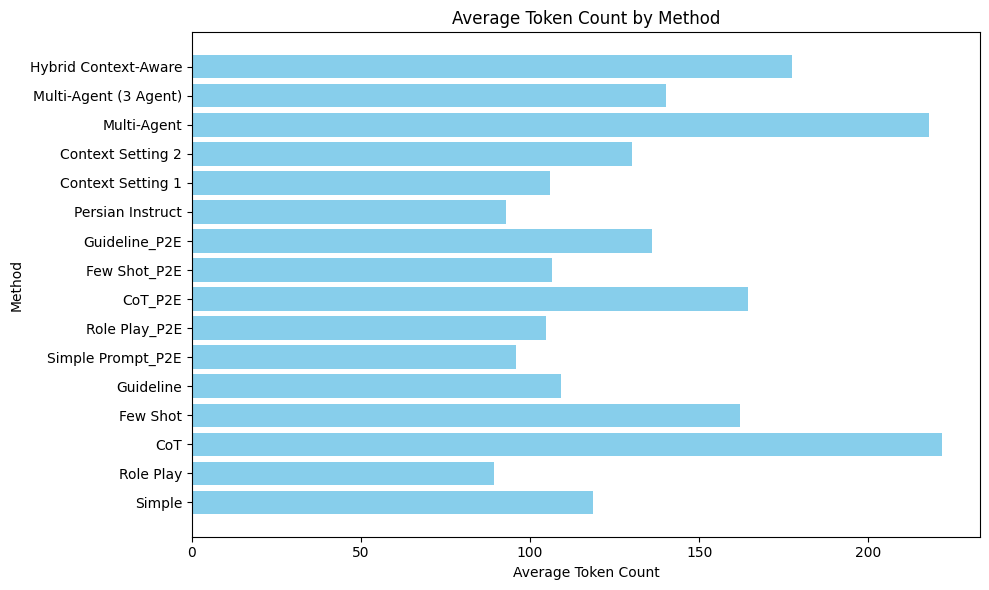

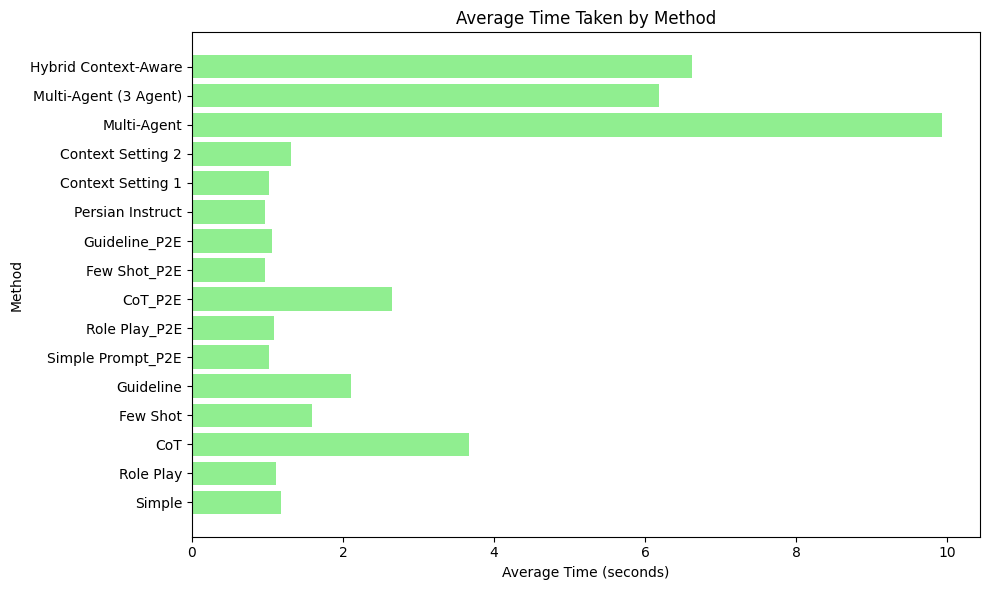

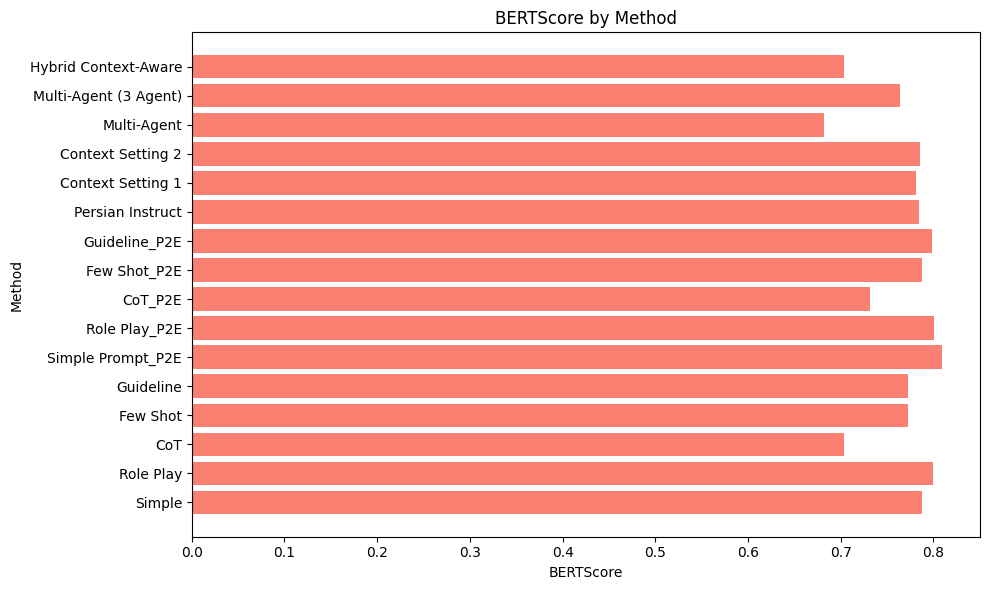

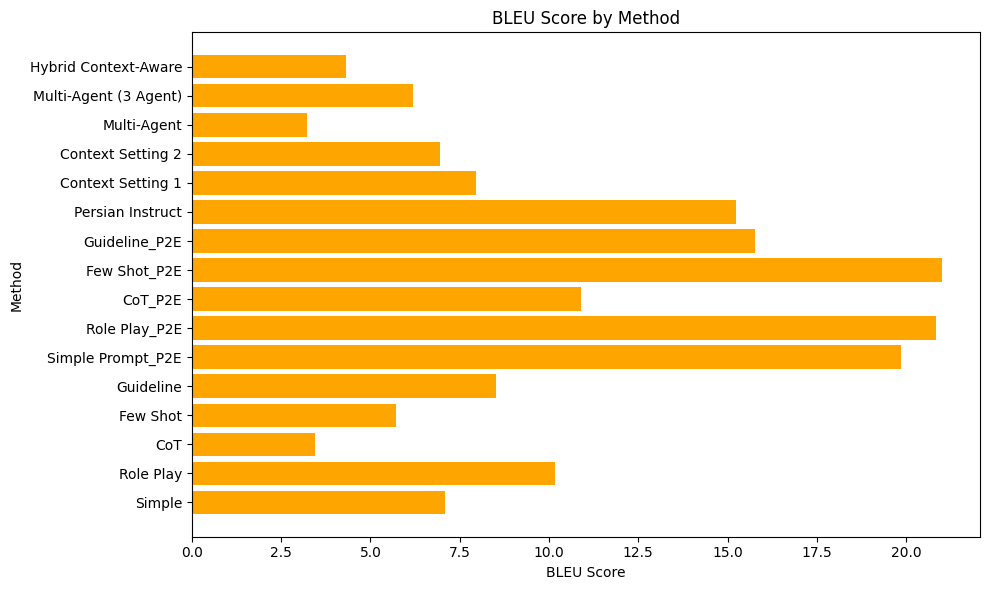

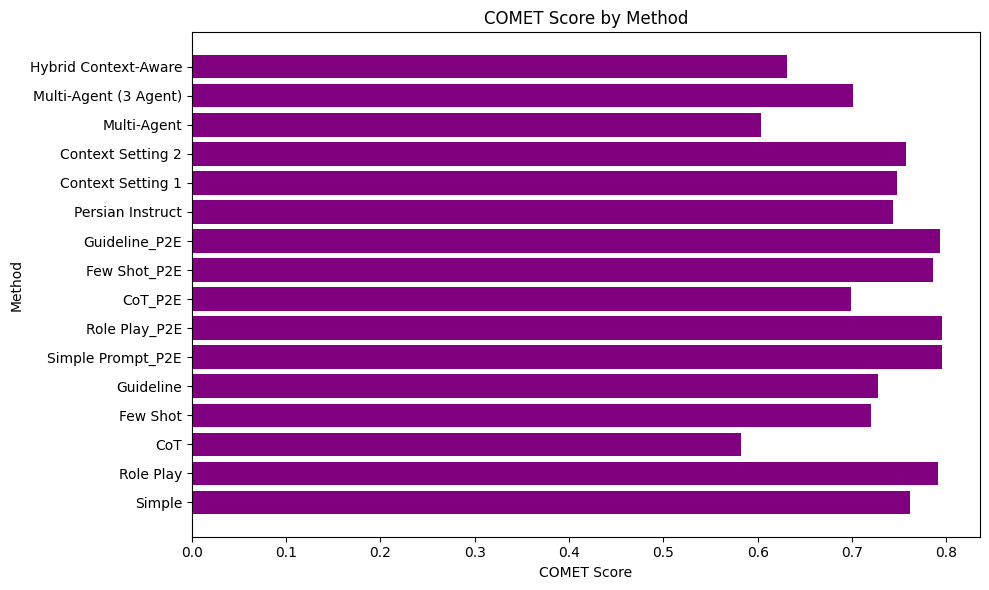

In [ ]:
import matplotlib.pyplot as plt

# Data for scores and metrics
methods = [
    "Simple", "Role Play", "CoT", "Few Shot", "Guideline", 
    "Simple Prompt_P2E", "Role Play_P2E", "CoT_P2E", "Few Shot_P2E", "Guideline_P2E", 
    "Persian Instruct", "Context Setting 1", "Context Setting 2", "Multi-Agent", 
    "Multi-Agent (3 Agent)", "Hybrid Context-Aware"
]

bert_scores = [
    0.7880631685256958, 0.7992753982543945, 0.7031748294830322, 0.7729318141937256, 0.772500216960907, 
    0.8097222447395325, 0.8003852367401123, 0.7320277094841003, 0.7874290943145752, 0.7982262372970581,
    0.7848653793334961, 0.7808573842048645, 0.7853549122810364, 0.6820521354675293, 
    0.7636498212814331, 0.7031549215316772
]

bleu_scores = [
    7.0984991336663885, 10.163132884281417, 3.463273594253818, 5.711474546391359, 8.519788496358794, 
    19.86537129653737, 20.8238859523453, 10.892352924051892, 21.014514023100908, 15.771454467688748,
    15.234251863755189, 7.957433275512116, 6.938797427216094, 3.225395302854989, 
    6.184179353320711, 4.331088461233868
]

comet_scores = [
    0.7620386776496779, 0.7908730703704762, 0.5828732167774776, 0.7201294435082741, 0.7272873340912585, 
    0.7950526835783472, 0.7959857779853748, 0.6989737810953608, 0.7861118490965862, 0.7938777618813064,
    0.7436096904412756, 
    0.7478673444041666, 0.7575936070028341, 0.6035063322984947, 
    0.7014940161750002, 0.6309797403947363
]

# Calculate average token counts and response times
average_token_counts = [
    df["Translation (Simple) Token Count"].mean(),
    df["Translation (Role Play) Token Count"].mean(),
    df["Translation (CoT) Token Count"].mean(),
    df["Translation (Few Shot) Token Count"].mean(),
    df["Translation (Guidline) Token Count"].mean(),
    df["Translation (Simple Prompt_P2E) Token Count"].mean(),
    df["Translation (Role Play_P2E) Token Count"].mean(),
    df["Translation (CoT_P2E) Token Count"].mean(),
    df["Translation (Few Shot_P2E) Token Count"].mean(),
    df["Translation (Guideline_P2E) Token Count"].mean(),
    df["Translation (Persian Instruct) Token Count"].mean(),
    df["Translation (Context Setting 1) Token Count"].mean(),
    df["Translation (Context Setting 2) Token Count"].mean(),
    df["Translation (Multi-Agent) Token Count"].mean(),
    df["Translation (Multi-Agent (3 Agent)) Token Count"].mean(),
    df["Translation (Hybrid Context-Aware) Token Count"].mean()
]

average_response_times = [
    df["Response Time (seconds) (Simple)"].mean(),
    df["Response Time (seconds) (Role Play)"].mean(),
    df["Response Time (seconds) (CoT)"].mean(),
    df["Response Time (seconds) (Few Shot)"].mean(),
    df["Response Time (seconds) (Guidline)"].mean(),
    df["Response Time (seconds) (Simple Prompt_P2E)"].mean(),
    df["Response Time (seconds) (Role Play_P2E)"].mean(),
    df["Response Time (seconds) (CoT_P2E)"].mean(),
    df["Response Time (seconds) (Few Shot_P2E)"].mean(),
    df["Response Time (seconds) (Guideline_P2E)"].mean(),    
    df["Response Time (seconds) (Persian Instruct)"].mean(),
    df["Response Time (seconds) (Context Setting 1)"].mean(),
    df["Response Time (seconds) (Context Setting 2)"].mean(),
    df["Response Time (seconds) (Multi-Agent)"].mean(),
    df["Response Time (seconds) (Multi-Agent (3 Agent))"].mean(),
    df["Response Time (seconds) (Hybrid Context-Aware)"].mean()
]

# Create a dataframe for plotting
metrics_df = pd.DataFrame({
    "Method": methods,
    "Average Token Count": average_token_counts,
    "Average Time (seconds)": average_response_times,
    "BERTScore": bert_scores,
    "BLEU Score": bleu_scores,
    "COMET Score": comet_scores
})

# Generate plots
plt.figure(figsize=(10, 6))
plt.barh(metrics_df["Method"], metrics_df["Average Token Count"], color='skyblue')
plt.xlabel("Average Token Count")
plt.ylabel("Method")
plt.title("Average Token Count by Method")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(metrics_df["Method"], metrics_df["Average Time (seconds)"], color='lightgreen')
plt.xlabel("Average Time (seconds)")
plt.ylabel("Method")
plt.title("Average Time Taken by Method")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(metrics_df["Method"], metrics_df["BERTScore"], color='salmon')
plt.xlabel("BERTScore")
plt.ylabel("Method")
plt.title("BERTScore by Method")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(metrics_df["Method"], metrics_df["BLEU Score"], color='orange')
plt.xlabel("BLEU Score")
plt.ylabel("Method")
plt.title("BLEU Score by Method")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(metrics_df["Method"], metrics_df["COMET Score"], color='purple')
plt.xlabel("COMET Score")
plt.ylabel("Method")
plt.title("COMET Score by Method")
plt.tight_layout()
plt.show()
